# Fruit Classification using CNNs on Augmented Dataset


## Importing Required Libraries and Packages

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

# Loading the Fruits360 Dataset

In [2]:
# Set the path to the dataset
dataset_path = '/Users/mac/Downloads/fruits-360/Training'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [3]:
# Get the list of folders (labels) in the training dataset
labels_count = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of labels (folders) in the training dataset:", labels_count)


Number of labels (folders) in the training dataset: 131


In [4]:
# Get a list of all labels (subfolder names) within the training folder
labels_list = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

print("List of labels (subfolder names) in the training dataset:")
print(labels_list)

List of labels (subfolder names) in the training dataset:
['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Nut Forest', 'Avocado', 'Tomato 2', 'Pomegranate', 'Dates', 'Carambula', 'Potato Red Washed', 'Granadilla', 'Kohlrabi', 'Tamarillo', 'Pepper Red', 'Fig', 'Ginger Root', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Cauliflower', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Nut Pecan', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Pepper Yellow', 'Grape Pink', 'Banana Red', 'Cucumber Ripe 2', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Chestnut', 'Plum', 'Potato Sweet', 'Cucumber Ripe', 'Hazelnut', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Pepper Orange', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan

# Filtering the dataset

In [5]:
# Define a list of fruit labels
fruit_labels = [
    'Apple Red Delicious', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo',
    'Pear', 'Cherry 1', 'Strawberry', 'Avocado', 'Pomegranate', 'Dates', 'Carambula', 'Granadilla', 'Tamarillo',
    'Fig', 'Kiwi', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Mandarine', 'Quince',
    'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Physalis',
    'Cherry Rainier', 'Maracuja', 'Plum', 'Hazelnut', 'Nectarine', 'Cantaloupe 2', 'Lychee', 'Clementine',
    'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Apple Braeburn', 'Mango',
    'Apple Crimson Snow', 'Passion Fruit', 'Apple Granny Smith', 'Apricot', 'Grape White 2', 'Limes',
    'Apple Pink Lady', 'Plum 3', 'Pear Williams', 'Peach 2', 'Pomelo Sweetie', 'Salak', 'Apple Golden 1', 'Banana',
    'Apple Red 2', 'Apple Red Yellow 2', 'Lemon Meyer', 'Plum 2', 'Tangelo', 'Papaya', 'Apple Red 3', 'Walnut',
    'Pear Abate', 'Pineapple', 'Cherry Wax Red', 'Mango Red', 'Orange', 'Kaki', 'Peach', 'Peach Flat'
]

# Get a list of all labels (subfolder names) within the training folder
labels_list = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Filter out only the fruit labels
filtered_fruit_labels = [label for label in labels_list if label in fruit_labels]

print("List of fruit labels (subfolder names) in the training dataset:")
print(filtered_fruit_labels)

List of fruit labels (subfolder names) in the training dataset:
['Apple Red Delicious', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Avocado', 'Pomegranate', 'Dates', 'Carambula', 'Granadilla', 'Tamarillo', 'Fig', 'Kiwi', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Mandarine', 'Quince', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Plum', 'Hazelnut', 'Nectarine', 'Cantaloupe 2', 'Lychee', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Apple Braeburn', 'Mango', 'Apple Crimson Snow', 'Passion Fruit', 'Apple Granny Smith', 'Grape White 2', 'Apricot', 'Limes', 'Apple Pink Lady', 'Plum 3', 'Pear Williams', 'Peach 2', 'Pomelo Sweetie', 'Salak', 'Apple Golden 1', 'Banana', 'Apple Red 2', 'Apple Red Yellow 2', 'Lemon Meyer', 'Plum 2', 'Tangelo', 'Papaya'

In [6]:
# Filtering fruits from the DataFrame
fruit_df = df[df['label'].isin(fruit_labels)].reset_index(drop=True)

# Exploring the Dataset

In [7]:
fruit_df.head()

image                label
0  /Users/mac/Downloads/fruits-360/Training/Apple...  Apple Red Delicious
1  /Users/mac/Downloads/fruits-360/Training/Apple...  Apple Red Delicious
2  /Users/mac/Downloads/fruits-360/Training/Apple...  Apple Red Delicious
3  /Users/mac/Downloads/fruits-360/Training/Apple...  Apple Red Delicious
4  /Users/mac/Downloads/fruits-360/Training/Apple...  Apple Red Delicious

In [8]:
fruit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39249 entries, 0 to 39248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   39249 non-null  object
 1   label   39249 non-null  object
dtypes: object(2)
memory usage: 613.4+ KB


In [9]:
# Total number of images in the fruit_df DataFrame
total_images = fruit_df.shape[0]
print("Total number of images:", total_images)

Total number of images: 39249


In [10]:
# Count the number of unique labels (fruits)
num_labels = fruit_df['label'].nunique()
print("Number of unique labels (fruits):", num_labels)

Number of unique labels (fruits): 77


In [11]:
# Count the number of images in each folder (label)
image_counts = fruit_df['label'].value_counts()
print("Number of images in each folder (label):")
print(image_counts)

Number of images in each folder (label):
Plum 3                900
Cherry 2              738
Melon Piel de Sapo    738
Cherry Rainier        738
Peach 2               738
                     ... 
Avocado               427
Mango Red             426
Plum 2                420
Pear Kaiser           300
Mangostan             300
Name: label, Length: 77, dtype: int64


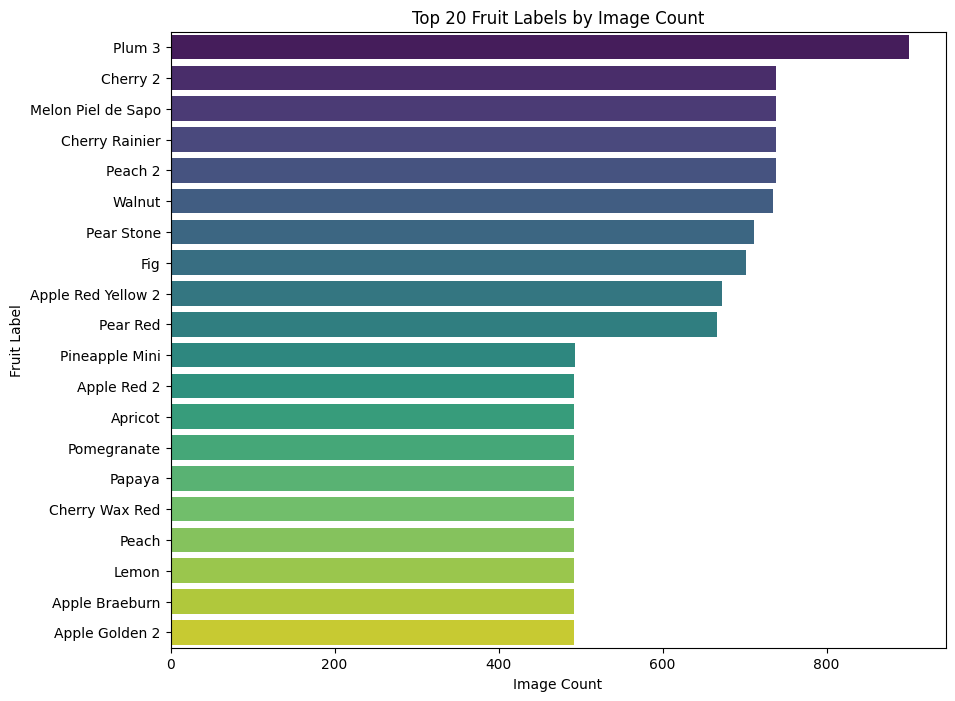

In [12]:
# Group the DataFrame by 'label' and count the number of images for each fruit
label_counts = fruit_df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Sort the DataFrame by counts in descending order
label_counts_sorted = label_counts.sort_values(by='count', ascending=False)

# Select the top 20 fruit labels by count
top_20_labels = label_counts_sorted.head(20)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='label', data=top_20_labels, palette='viridis')
plt.title('Top 20 Fruit Labels by Image Count')
plt.xlabel('Image Count')
plt.ylabel('Fruit Label')
plt.show()

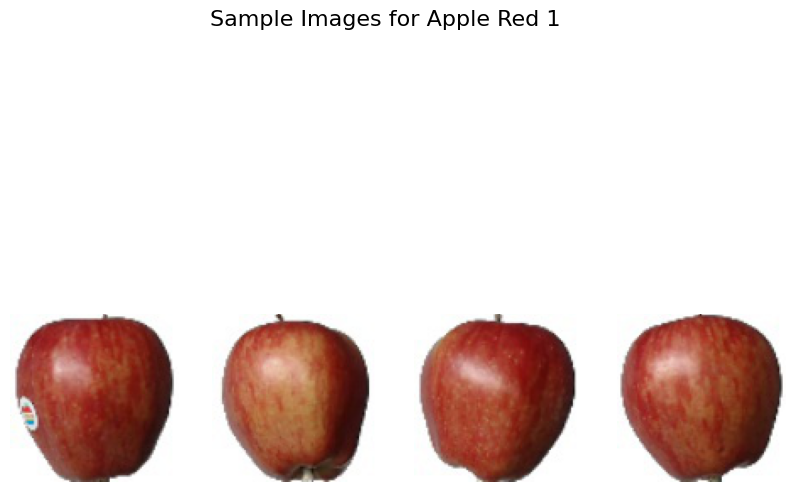

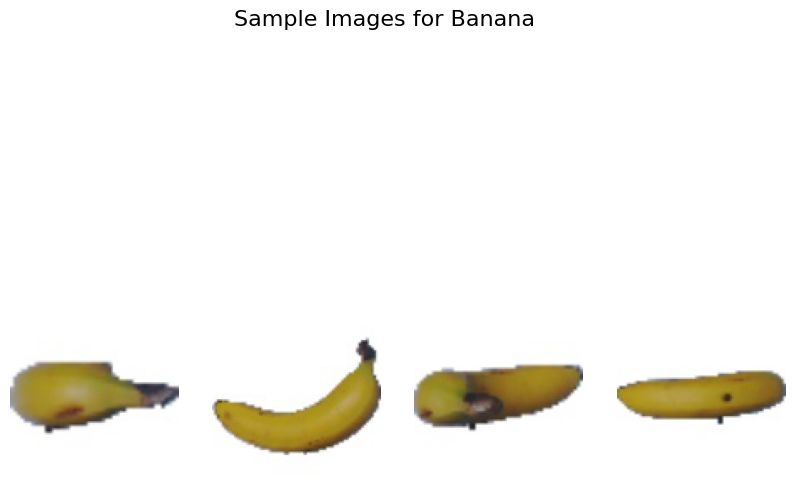

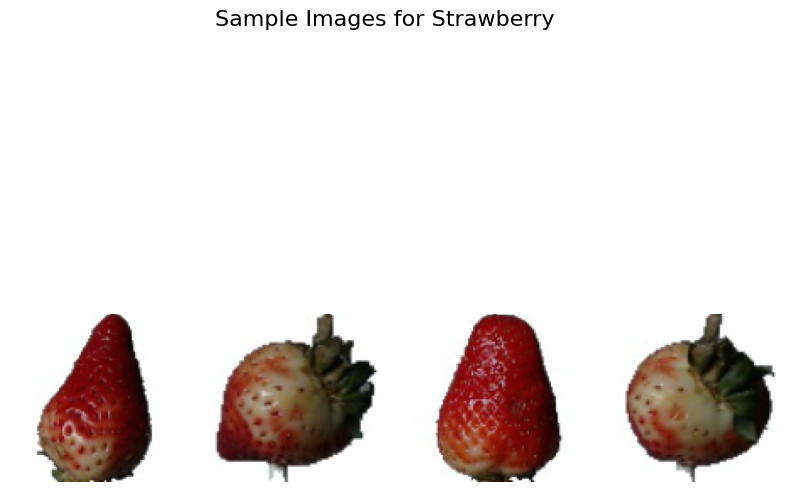

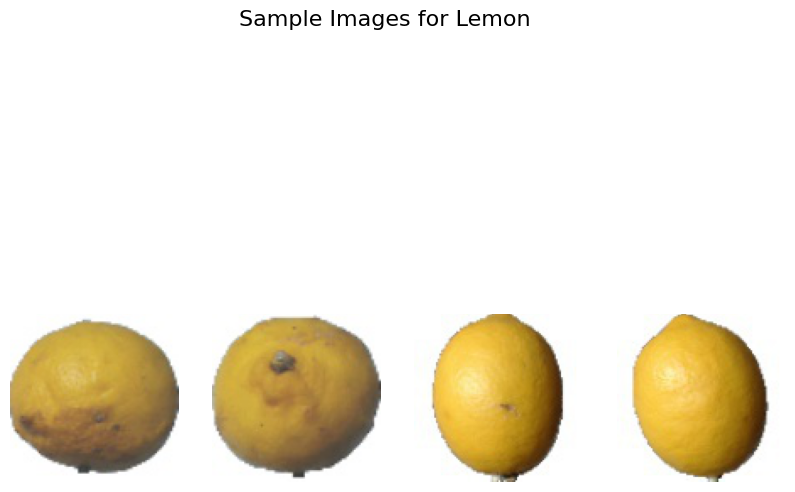

In [13]:
import random

# Function to display sample images for a specific fruit label
def display_sample_images(fruit_label, num_samples=4):
    # Filter the DataFrame for images of the specified fruit label
    filtered_images = fruit_df[fruit_df['label'] == fruit_label]['image'].values
    
    # Randomly select a subset of images (num_samples)
    sample_images = random.sample(list(filtered_images), num_samples)
    
    # Display the sample images in a grid
    plt.figure(figsize=(10, 8))
    for i, image_path in enumerate(sample_images):
        plt.subplot(1, num_samples, i + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f'Sample Images for {fruit_label}', fontsize=16)
    plt.show()

# Display sample images for a few selected fruit labels
selected_fruits = ['Apple Red 1', 'Banana', 'Strawberry', 'Lemon']

for fruit_label in selected_fruits:
    display_sample_images(fruit_label)


# Splitting Data into Train and Test

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fruit_df['image'], fruit_df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Data Augmentation

In [15]:
# Set the image size and batch size
image_size = (50, 50)
batch_size = 64

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 31399 validated image filenames belonging to 77 classes.
Found 7850 validated image filenames belonging to 77 classes.


# Modeling

In [16]:
# Count the number of unique fruit labels in your filtered DataFrame
num_labels = fruit_df['label'].nunique()
input_shape = (50, 50, 3)
# Adjust the output layer in your model to match the number of unique fruit labels
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))  # Updated output layer

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model on the training data
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
491/491 [==============================] - 101s 204ms/step - loss: 1.6036 - accuracy: 0.5432 - val_loss: 0.6756 - val_accuracy: 0.7785
Epoch 2/10
491/491 [==============================] - 93s 189ms/step - loss: 0.4421 - accuracy: 0.8538 - val_loss: 0.3781 - val_accuracy: 0.8693
Epoch 3/10
491/491 [==============================] - 90s 184ms/step - loss: 0.2922 - accuracy: 0.9012 - val_loss: 0.1803 - val_accuracy: 0.9410
Epoch 4/10
491/491 [==============================] - 88s 179ms/step - loss: 0.2017 - accuracy: 0.9331 - val_loss: 0.1642 - val_accuracy: 0.9446
Epoch 5/10
491/491 [==============================] - 82s 167ms/step - loss: 0.1783 - accuracy: 0.9407 - val_loss: 0.2029 - val_accuracy: 0.9308
Epoch 6/10
491/491 [==============================] - 83s 168ms/step - loss: 0.1482 - accuracy: 0.9507 - val_loss: 0.1987 - val_accuracy: 0.9369
Epoch 7/10
491/491 [==============================] - 78s 159ms/step - loss: 0.1249 - accuracy: 0.9572 - val_loss: 0.1089 - val_a

# Evaluating the Model

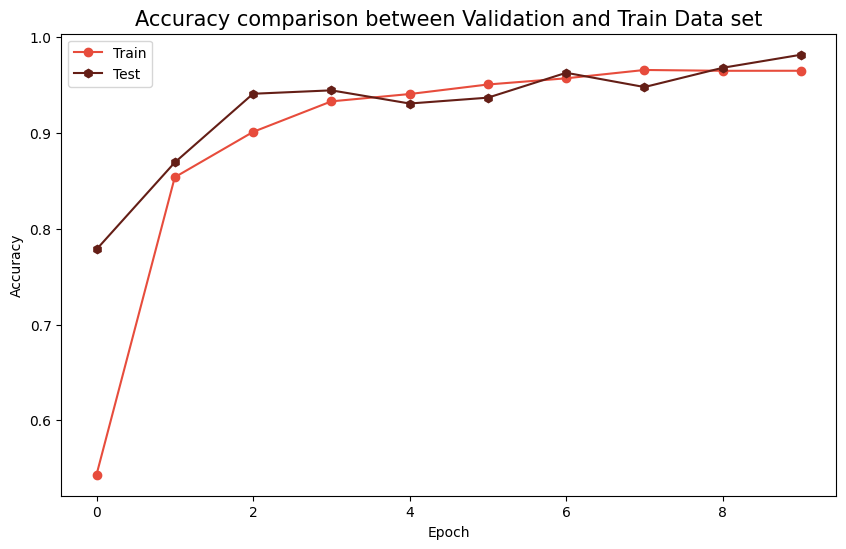

In [19]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

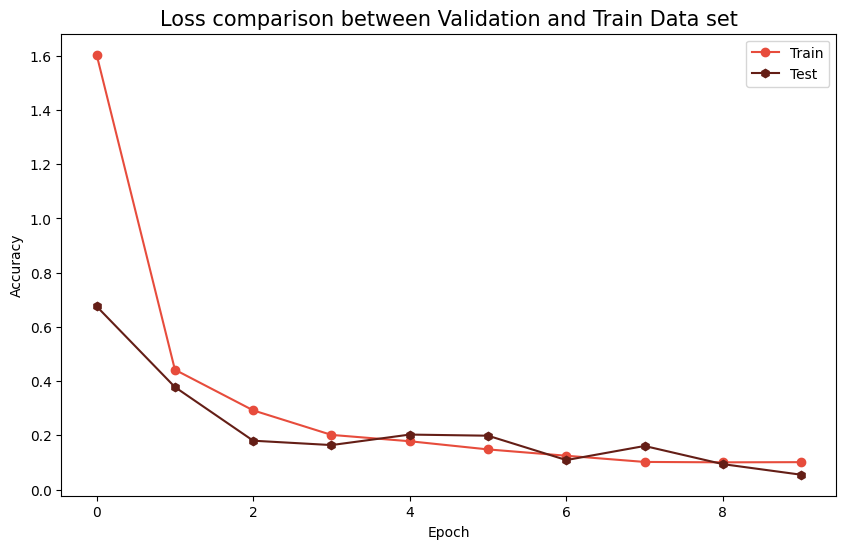

In [20]:
# Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color="#E74C3C", marker='o')
plt.plot(history.history['val_loss'], color='#641E16', marker='h')
plt.title('Loss comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [21]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

123/123 [==============================] - 12s 93ms/step - loss: 0.0572 - accuracy: 0.9818
Accuracy: 0.9817834496498108


# Saving Model

In [22]:
# Save the model
model.save('fmodel.keras')  # Save the model in the native Keras format
print("Model saved successfully!")

Model saved successfully!


# Testing on unseen data

1/1 [==============================] - 0s 269ms/step


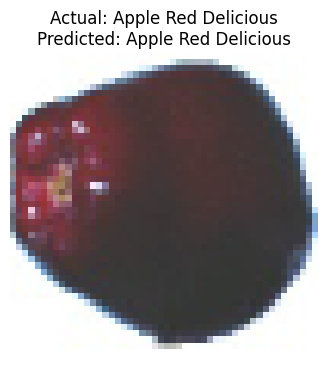

1/1 [==============================] - 0s 17ms/step


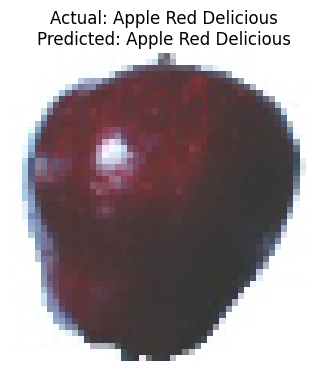

1/1 [==============================] - 0s 16ms/step


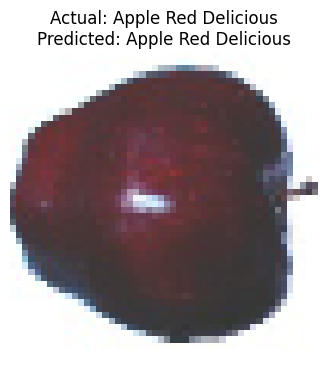

1/1 [==============================] - 0s 16ms/step


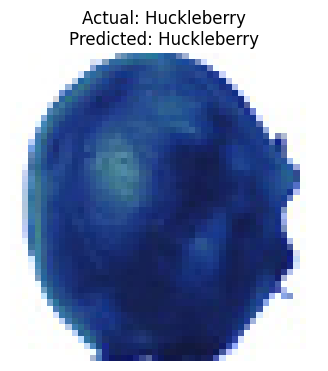

1/1 [==============================] - 0s 17ms/step


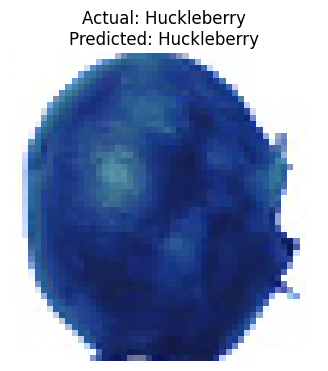

1/1 [==============================] - 0s 18ms/step


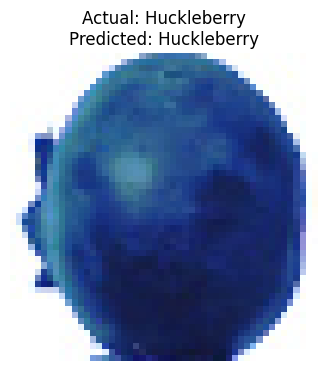

1/1 [==============================] - 0s 16ms/step


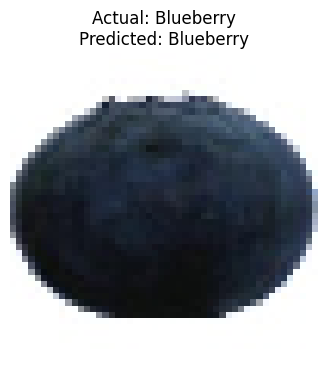

1/1 [==============================] - 0s 16ms/step


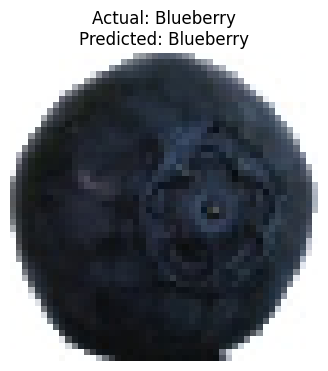

1/1 [==============================] - 0s 16ms/step


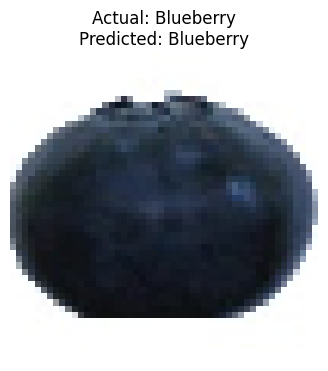

1/1 [==============================] - 0s 21ms/step


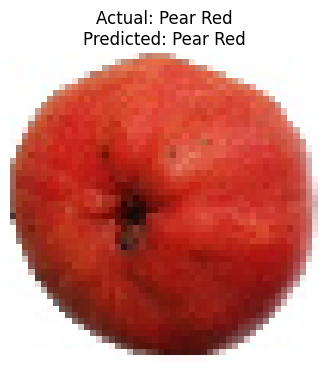

1/1 [==============================] - 0s 18ms/step


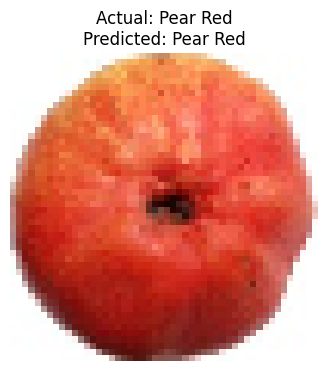

1/1 [==============================] - 0s 20ms/step


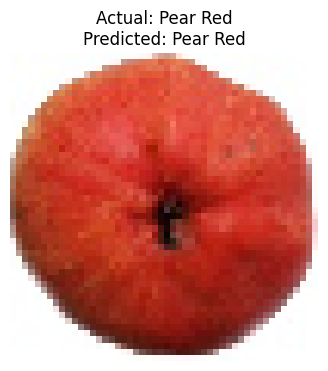

1/1 [==============================] - 0s 18ms/step


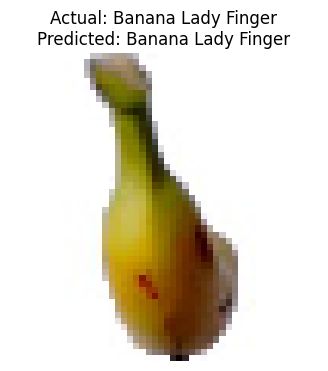

1/1 [==============================] - 0s 21ms/step


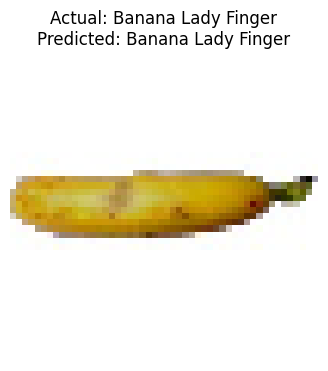

1/1 [==============================] - 0s 19ms/step


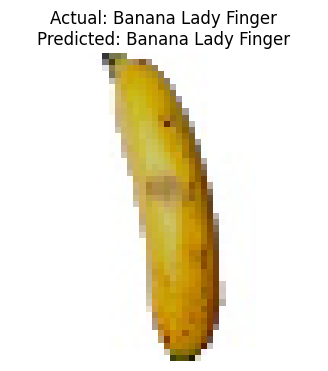

1/1 [==============================] - 0s 20ms/step


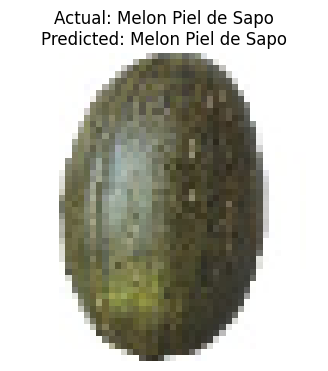

1/1 [==============================] - 0s 19ms/step


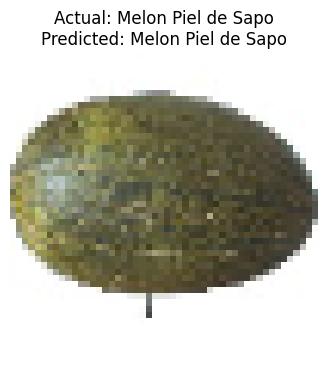

1/1 [==============================] - 0s 19ms/step


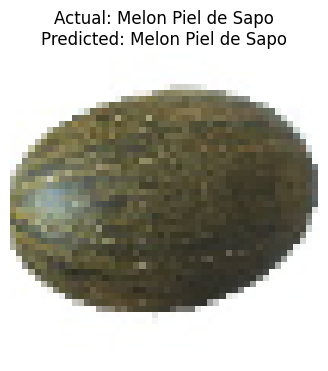

1/1 [==============================] - 0s 19ms/step


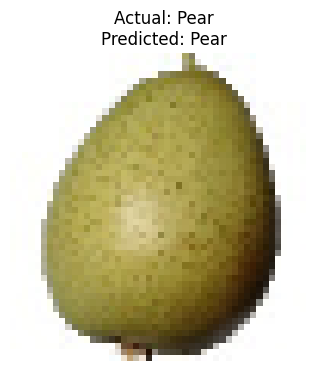

1/1 [==============================] - 0s 19ms/step


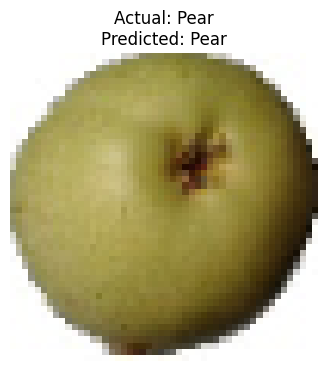

1/1 [==============================] - 0s 20ms/step


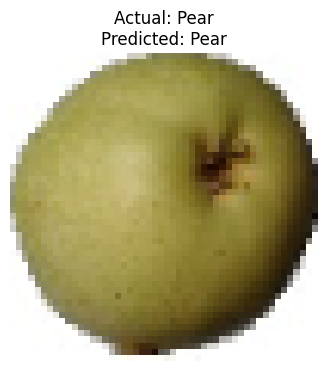

1/1 [==============================] - 0s 21ms/step


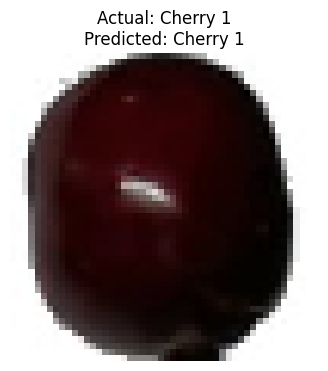

1/1 [==============================] - 0s 17ms/step


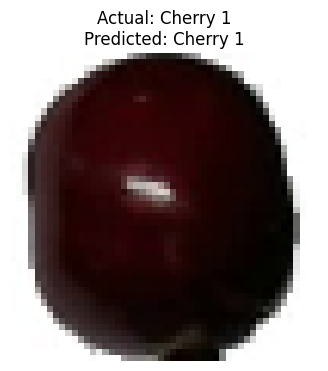

1/1 [==============================] - 0s 16ms/step


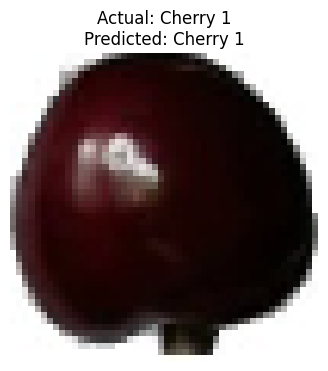

1/1 [==============================] - 0s 18ms/step


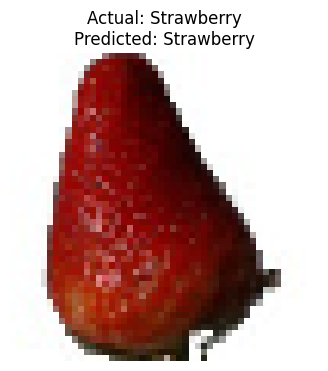

1/1 [==============================] - 0s 22ms/step


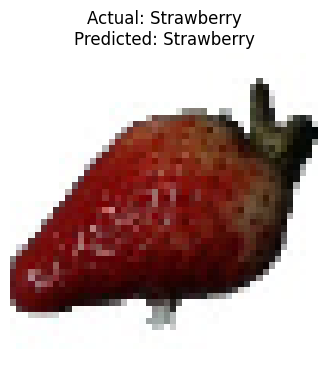

1/1 [==============================] - 0s 16ms/step


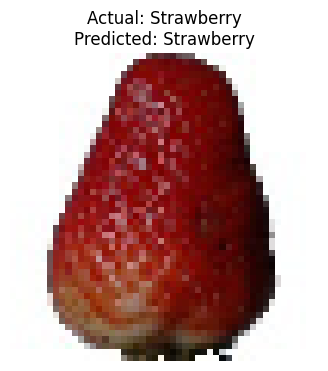

1/1 [==============================] - 0s 16ms/step


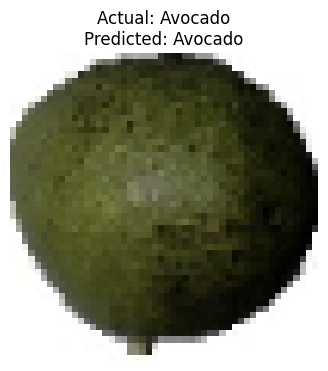

1/1 [==============================] - 0s 17ms/step


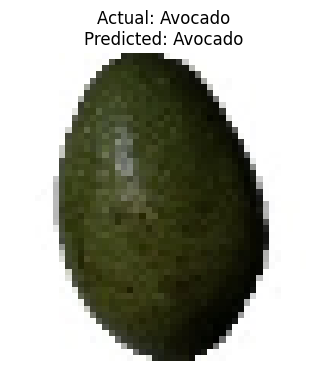

1/1 [==============================] - 0s 18ms/step


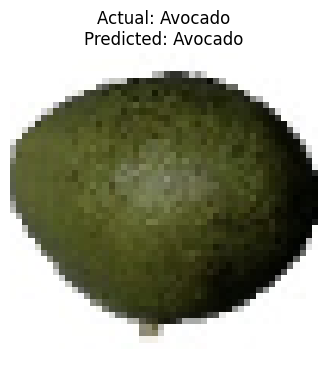

1/1 [==============================] - 0s 18ms/step


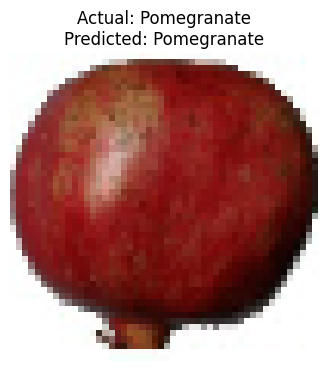

1/1 [==============================] - 0s 18ms/step


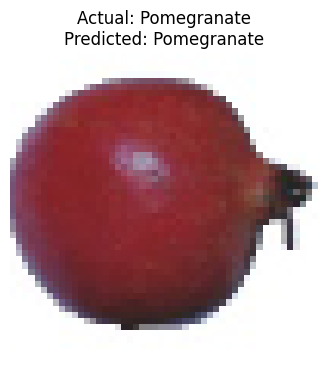

1/1 [==============================] - 0s 18ms/step


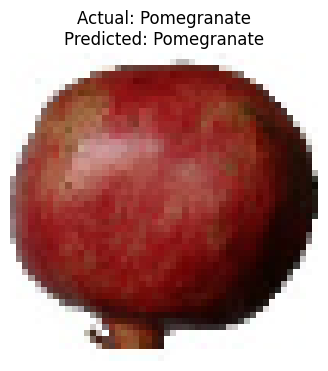

1/1 [==============================] - 0s 17ms/step


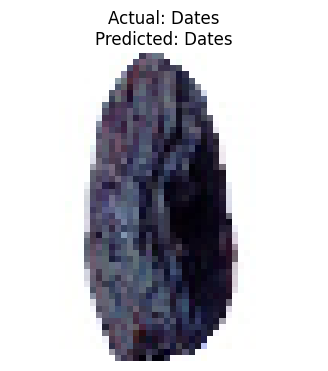

1/1 [==============================] - 0s 18ms/step


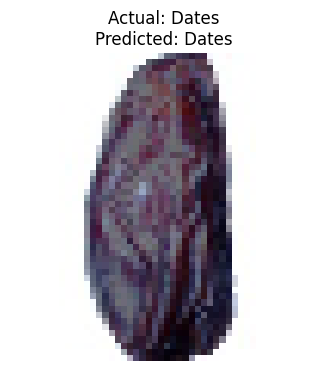

1/1 [==============================] - 0s 17ms/step


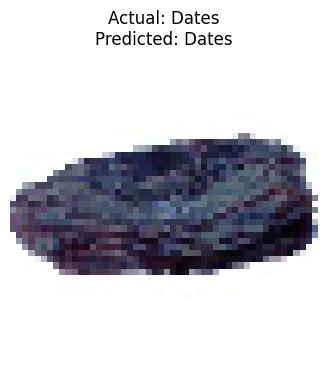

1/1 [==============================] - 0s 17ms/step


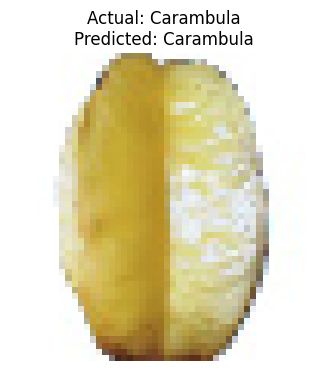

1/1 [==============================] - 0s 17ms/step


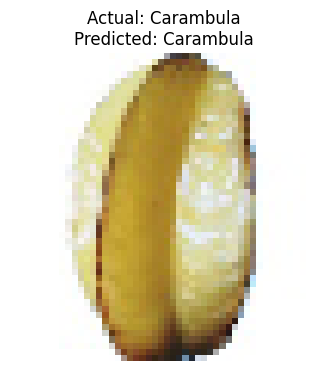

1/1 [==============================] - 0s 19ms/step


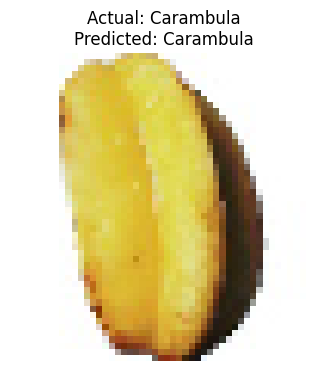

1/1 [==============================] - 0s 18ms/step


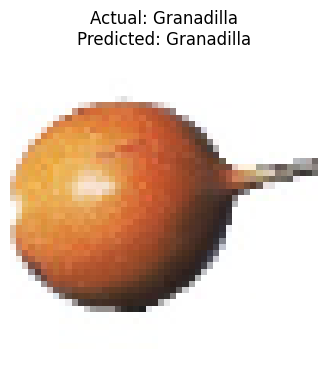

1/1 [==============================] - 0s 20ms/step


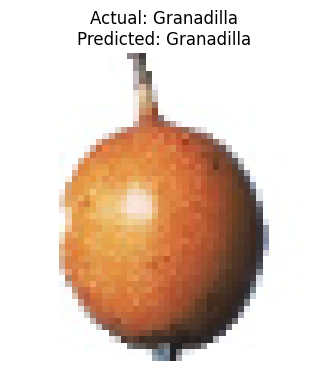

1/1 [==============================] - 0s 16ms/step


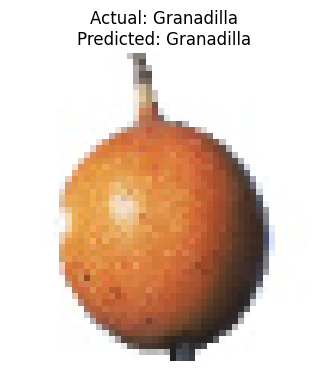

1/1 [==============================] - 0s 16ms/step


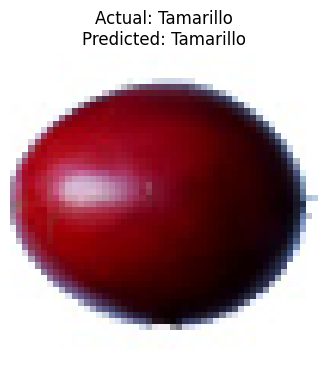

1/1 [==============================] - 0s 17ms/step


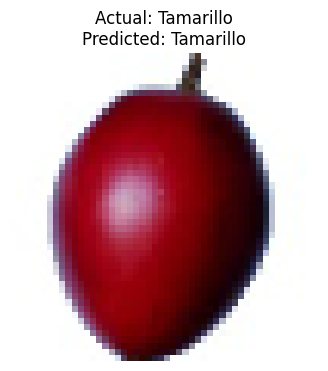

1/1 [==============================] - 0s 18ms/step


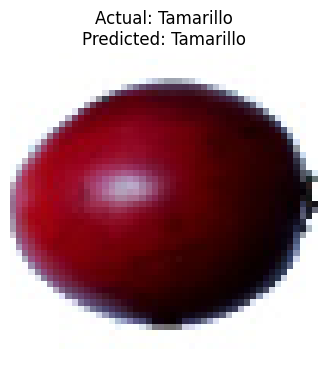

1/1 [==============================] - 0s 17ms/step


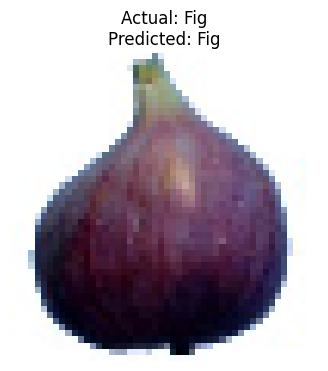

1/1 [==============================] - 0s 17ms/step


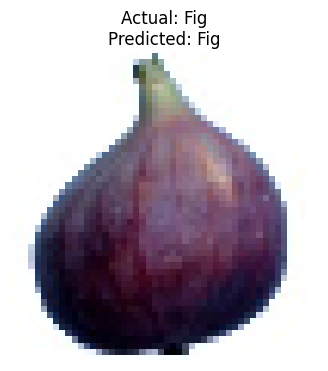

1/1 [==============================] - 0s 17ms/step


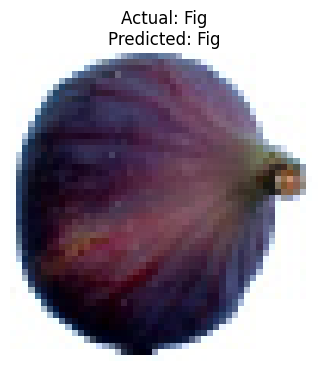

1/1 [==============================] - 0s 17ms/step


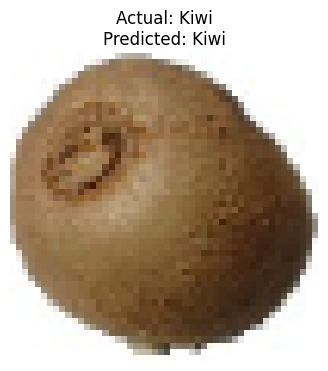

1/1 [==============================] - 0s 18ms/step


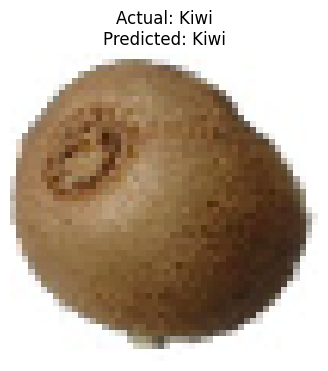

1/1 [==============================] - 0s 20ms/step


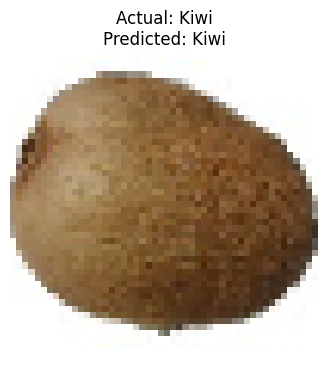

1/1 [==============================] - 0s 19ms/step


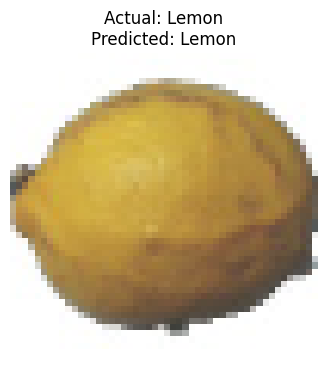

1/1 [==============================] - 0s 20ms/step


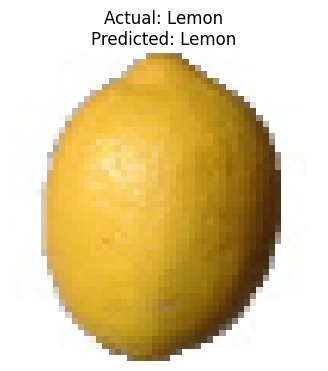

1/1 [==============================] - 0s 19ms/step


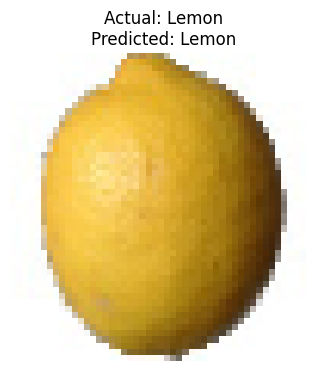

1/1 [==============================] - 0s 19ms/step


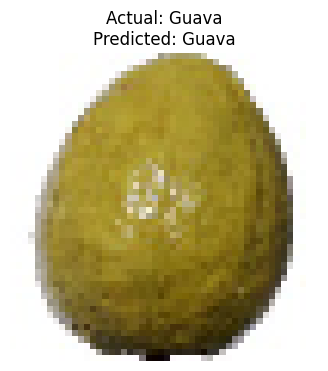

1/1 [==============================] - 0s 18ms/step


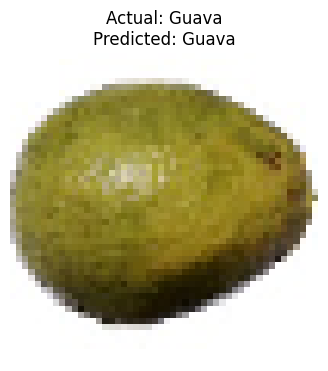

1/1 [==============================] - 0s 18ms/step


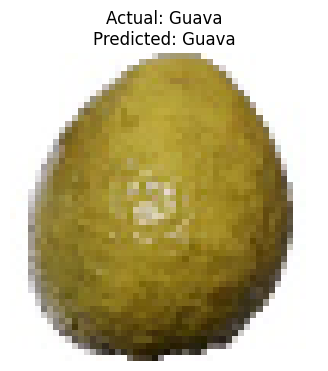

1/1 [==============================] - 0s 19ms/step


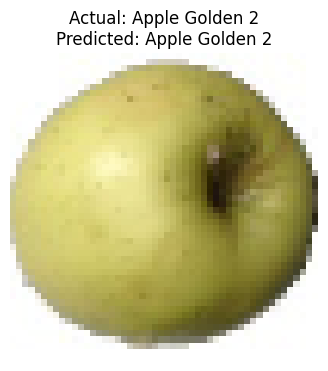

1/1 [==============================] - 0s 21ms/step


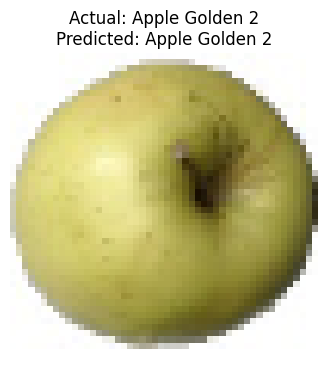

1/1 [==============================] - 0s 19ms/step


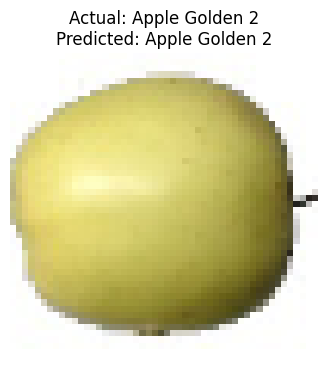

1/1 [==============================] - 0s 18ms/step


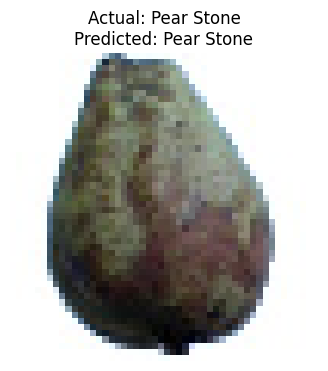

1/1 [==============================] - 0s 20ms/step


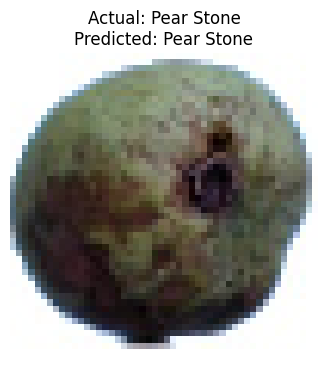

1/1 [==============================] - 0s 19ms/step


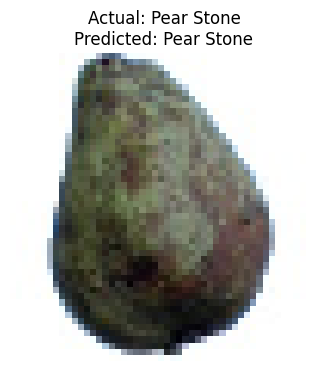

1/1 [==============================] - 0s 18ms/step


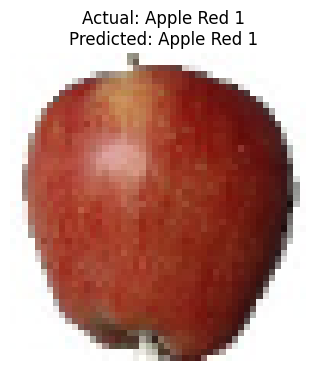

1/1 [==============================] - 0s 19ms/step


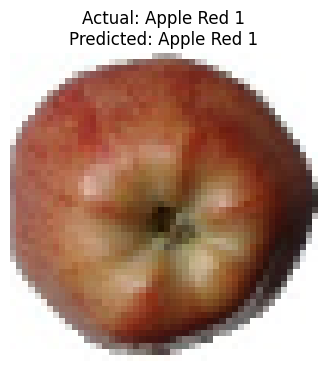

1/1 [==============================] - 0s 19ms/step


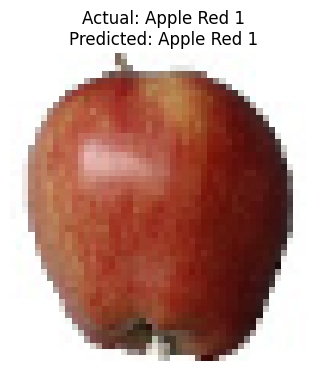

1/1 [==============================] - 0s 21ms/step


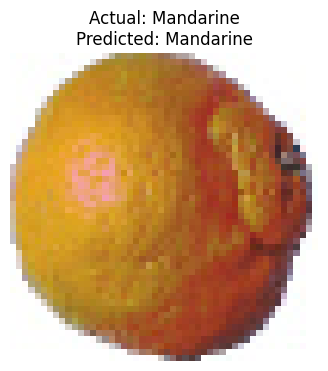

1/1 [==============================] - 0s 19ms/step


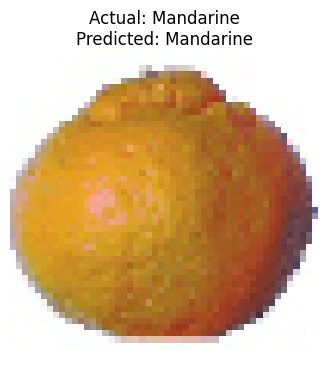

1/1 [==============================] - 0s 19ms/step


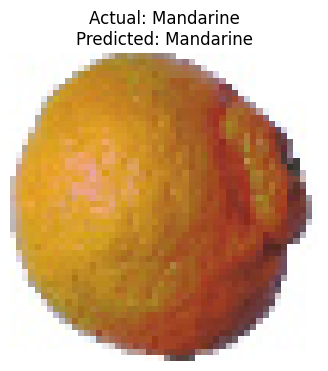

1/1 [==============================] - 0s 19ms/step


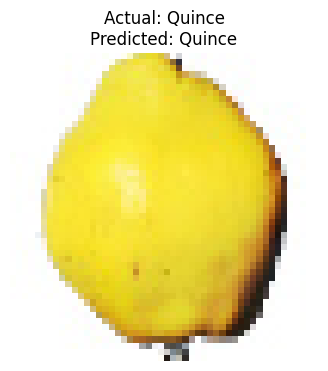

1/1 [==============================] - 0s 19ms/step


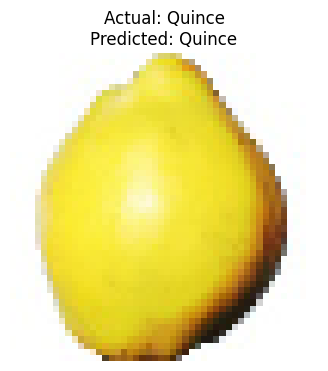

1/1 [==============================] - 0s 19ms/step


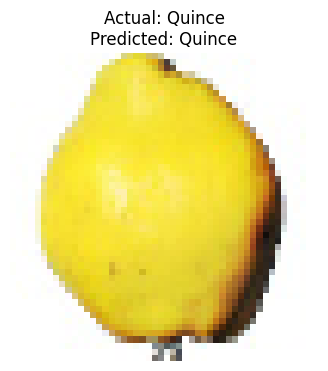

1/1 [==============================] - 0s 18ms/step


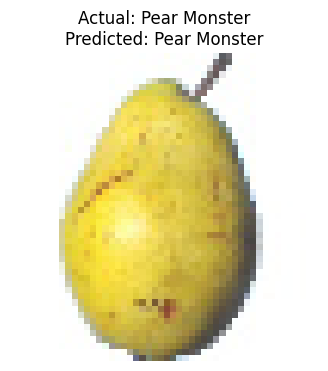

1/1 [==============================] - 0s 18ms/step


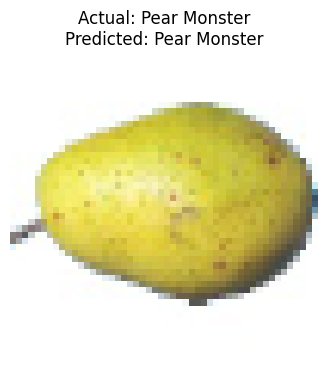

1/1 [==============================] - 0s 20ms/step


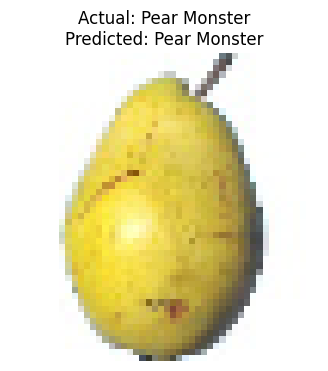

1/1 [==============================] - 0s 21ms/step


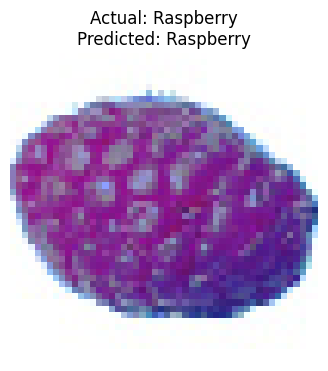

1/1 [==============================] - 0s 19ms/step


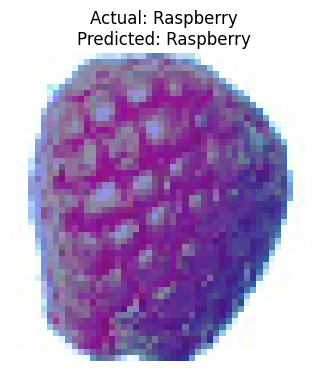

1/1 [==============================] - 0s 19ms/step


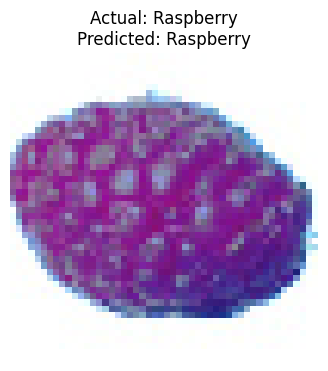

1/1 [==============================] - 0s 19ms/step


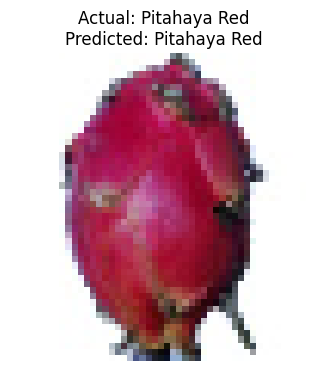

1/1 [==============================] - 0s 21ms/step


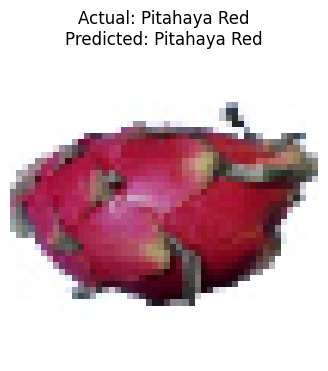

1/1 [==============================] - 0s 17ms/step


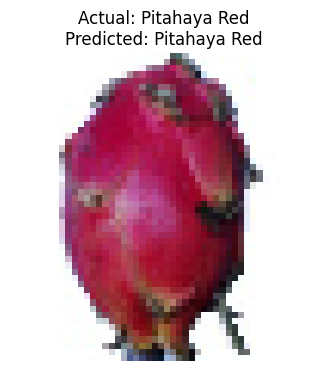

1/1 [==============================] - 0s 17ms/step


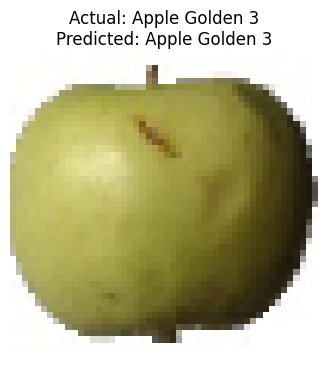

1/1 [==============================] - 0s 18ms/step


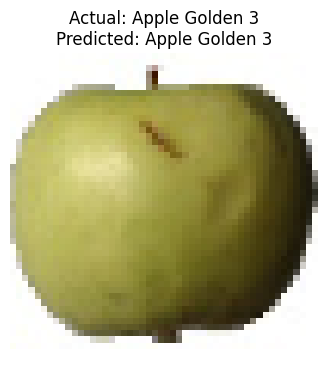

1/1 [==============================] - 0s 19ms/step


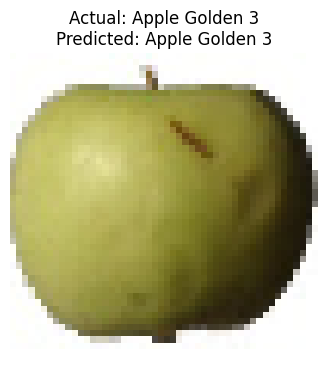

1/1 [==============================] - 0s 18ms/step


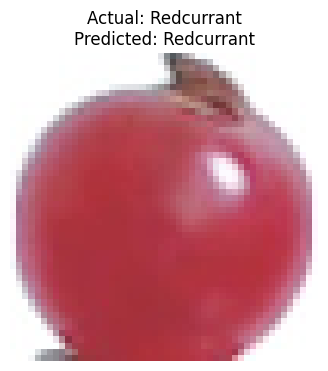

1/1 [==============================] - 0s 18ms/step


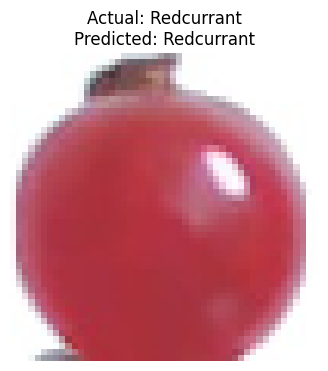

1/1 [==============================] - 0s 20ms/step


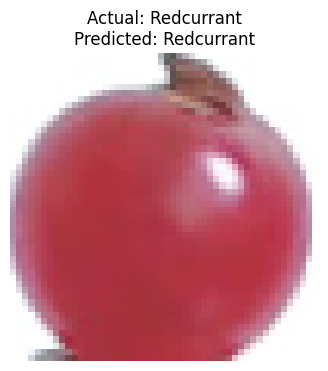

1/1 [==============================] - 0s 18ms/step


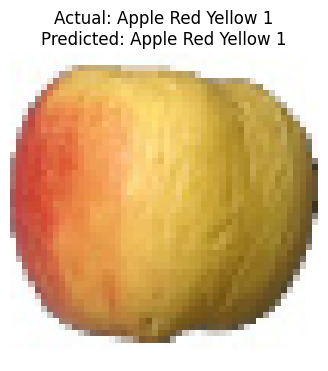

1/1 [==============================] - 0s 19ms/step


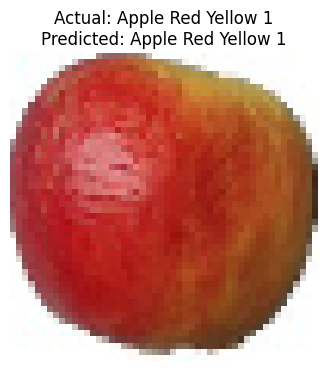

1/1 [==============================] - 0s 19ms/step


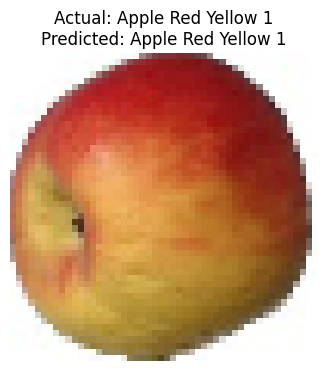

1/1 [==============================] - 0s 18ms/step


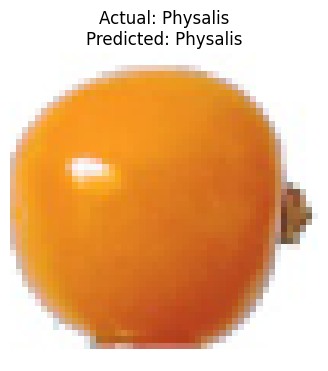

1/1 [==============================] - 0s 19ms/step


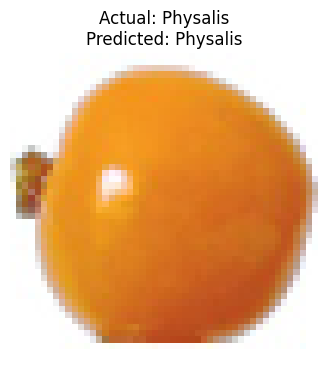

1/1 [==============================] - 0s 21ms/step


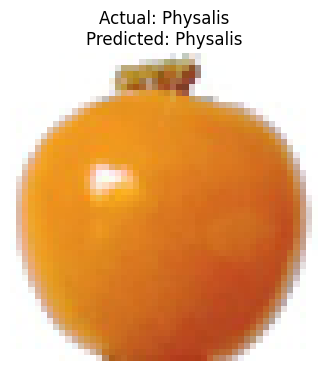

1/1 [==============================] - 0s 19ms/step


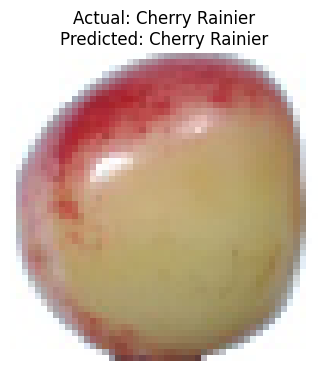

1/1 [==============================] - 0s 18ms/step


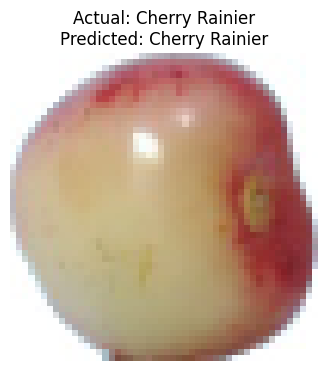

1/1 [==============================] - 0s 18ms/step


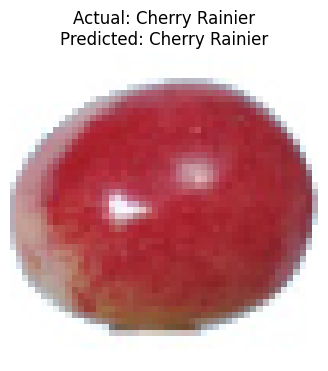

1/1 [==============================] - 0s 18ms/step


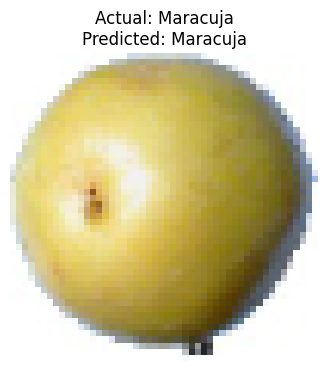

1/1 [==============================] - 0s 19ms/step


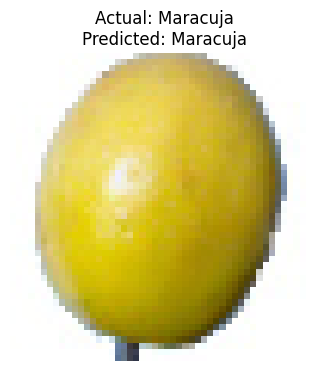

1/1 [==============================] - 0s 19ms/step


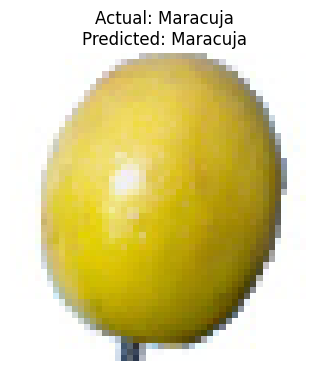

1/1 [==============================] - 0s 18ms/step


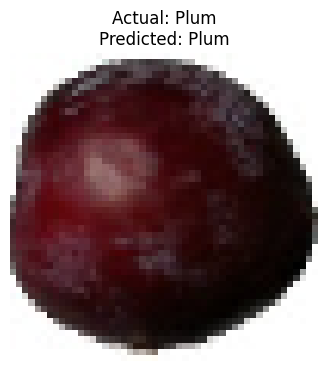

1/1 [==============================] - 0s 18ms/step


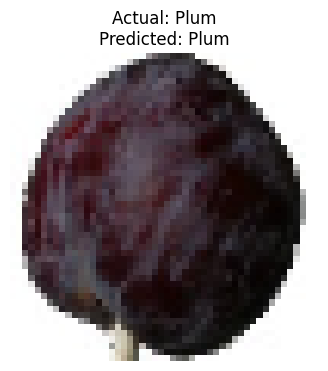

1/1 [==============================] - 0s 18ms/step


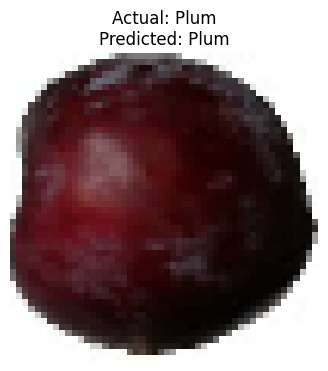

1/1 [==============================] - 0s 19ms/step


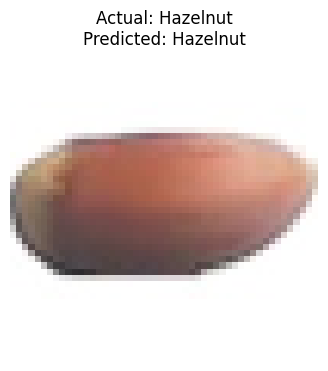

1/1 [==============================] - 0s 18ms/step


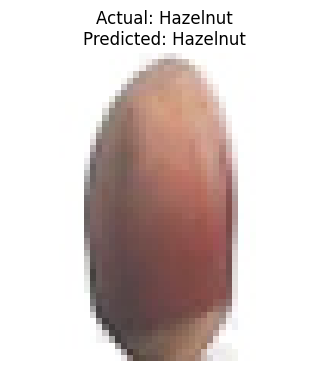

1/1 [==============================] - 0s 19ms/step


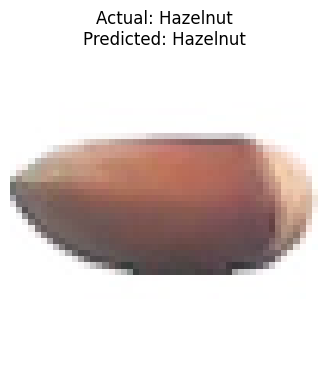

1/1 [==============================] - 0s 18ms/step


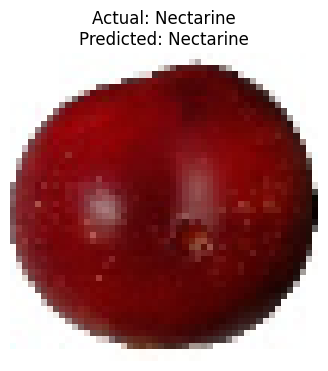

1/1 [==============================] - 0s 17ms/step


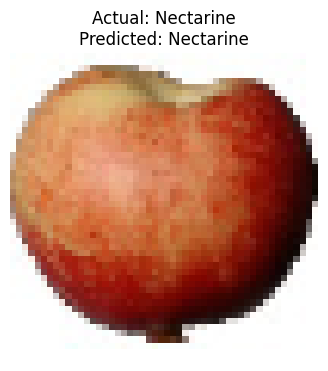

1/1 [==============================] - 0s 20ms/step


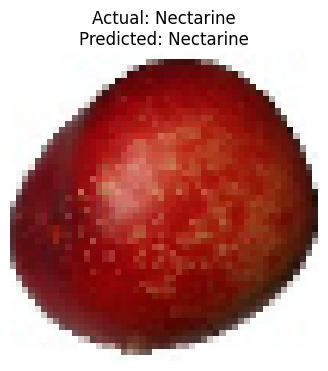

1/1 [==============================] - 0s 16ms/step


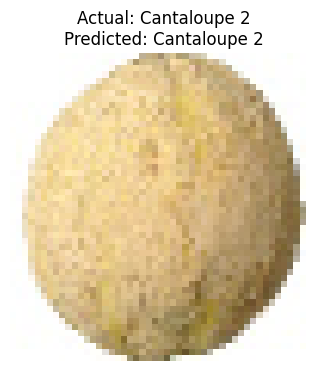

1/1 [==============================] - 0s 16ms/step


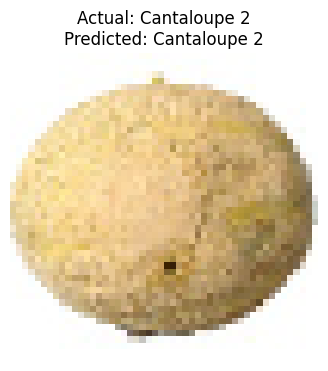

1/1 [==============================] - 0s 17ms/step


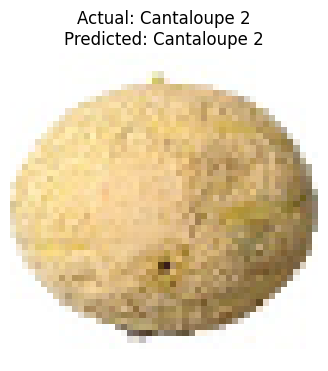

1/1 [==============================] - 0s 18ms/step


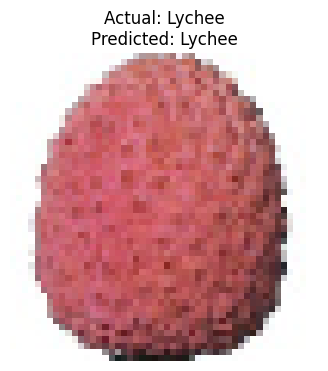

1/1 [==============================] - 0s 18ms/step


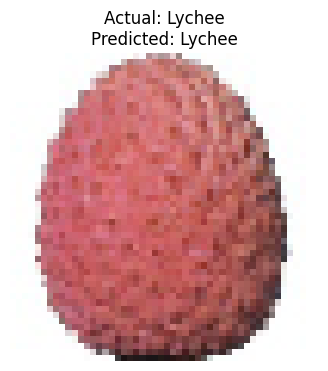

1/1 [==============================] - 0s 17ms/step


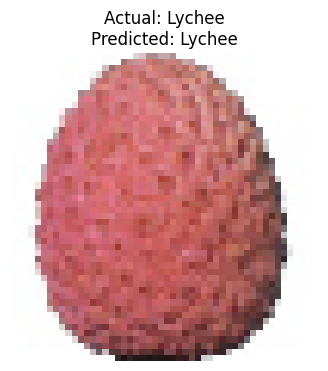

1/1 [==============================] - 0s 17ms/step


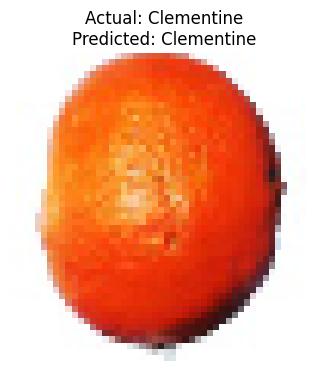

1/1 [==============================] - 0s 16ms/step


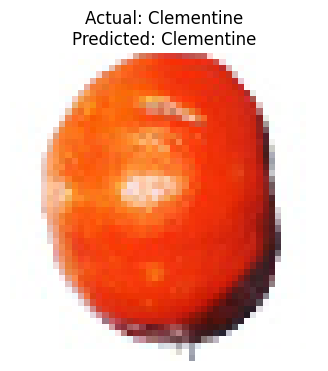

1/1 [==============================] - 0s 16ms/step


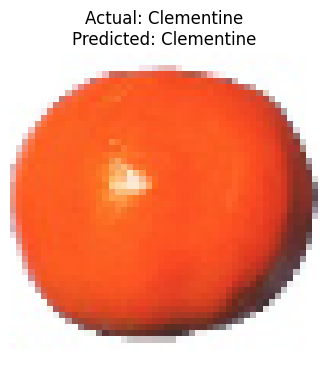

1/1 [==============================] - 0s 18ms/step


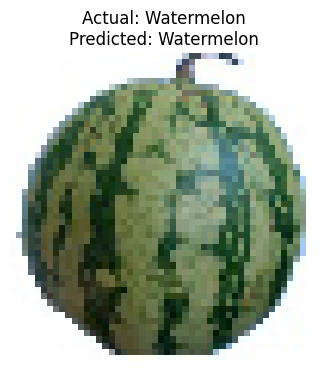

1/1 [==============================] - 0s 16ms/step


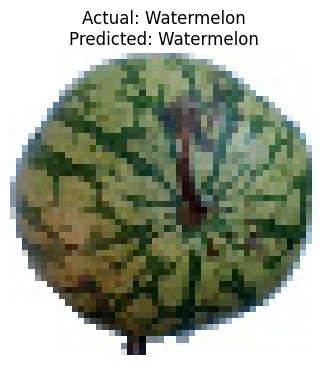

1/1 [==============================] - 0s 17ms/step


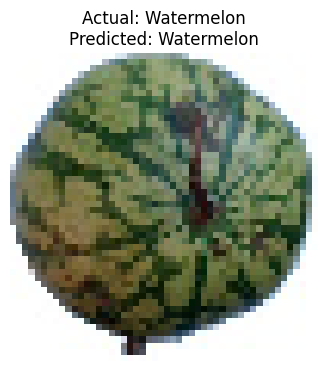

1/1 [==============================] - 0s 16ms/step


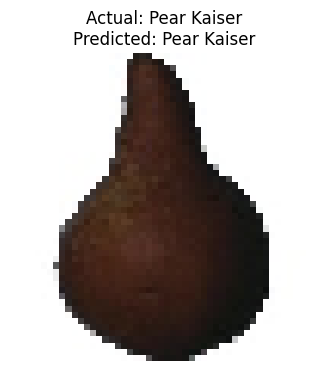

1/1 [==============================] - 0s 17ms/step


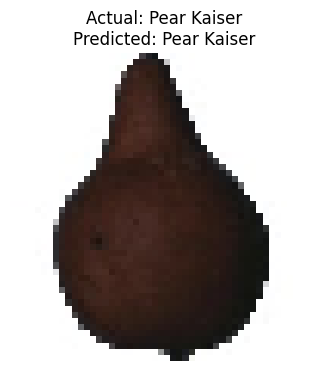

1/1 [==============================] - 0s 16ms/step


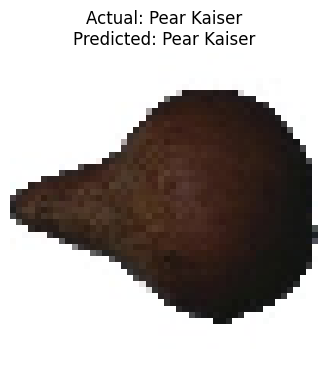

1/1 [==============================] - 0s 17ms/step


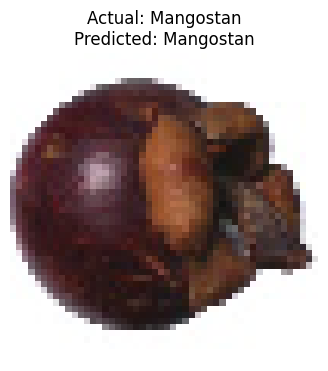

1/1 [==============================] - 0s 16ms/step


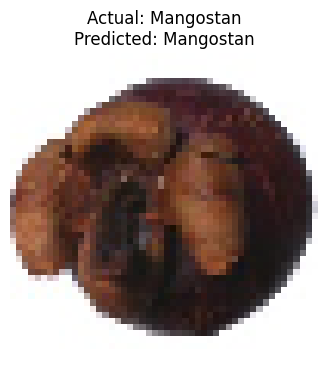

1/1 [==============================] - 0s 16ms/step


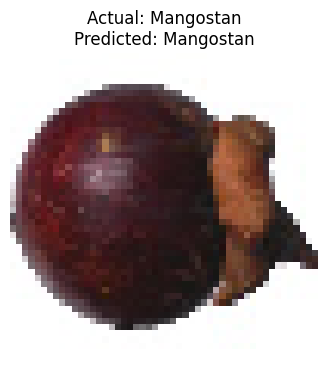

1/1 [==============================] - 0s 16ms/step


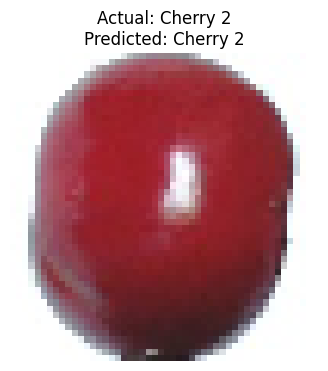

1/1 [==============================] - 0s 16ms/step


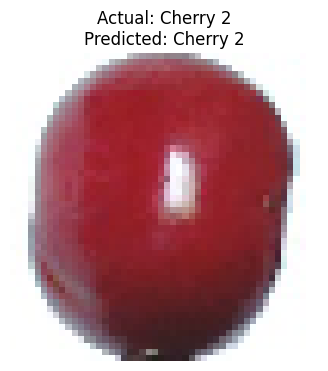

1/1 [==============================] - 0s 17ms/step


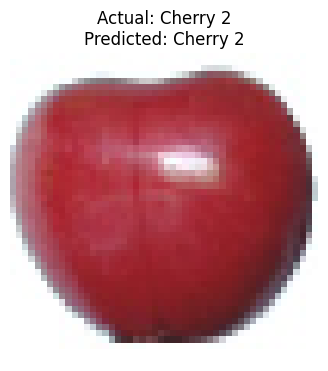

1/1 [==============================] - 0s 17ms/step


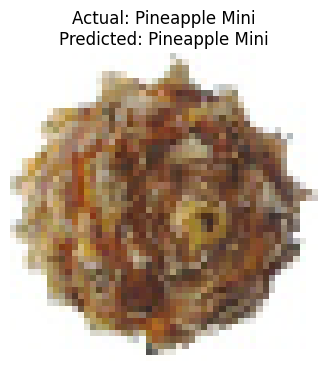

1/1 [==============================] - 0s 16ms/step


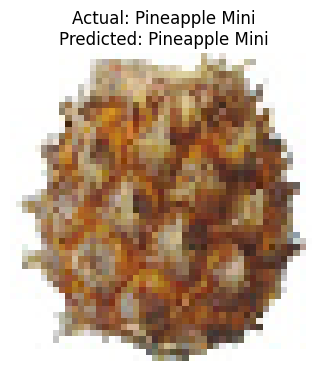

1/1 [==============================] - 0s 17ms/step


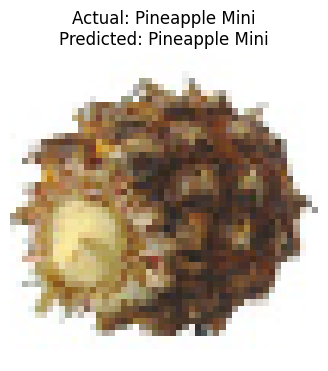

1/1 [==============================] - 0s 17ms/step


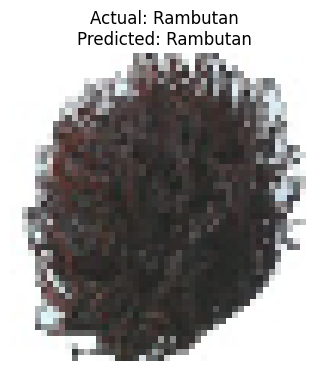

1/1 [==============================] - 0s 16ms/step


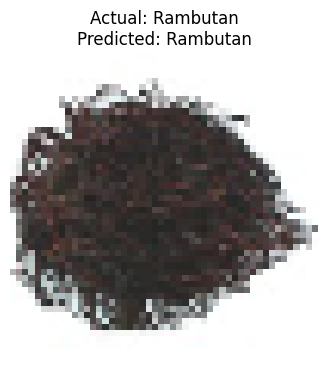

1/1 [==============================] - 0s 17ms/step


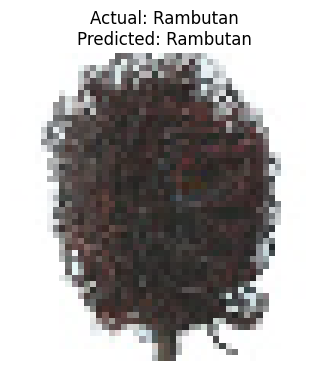

1/1 [==============================] - 0s 18ms/step


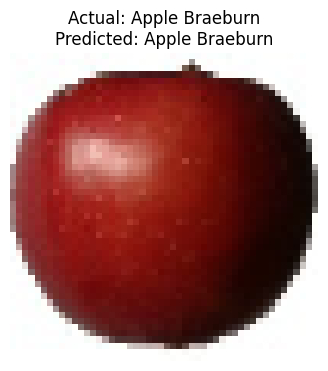

1/1 [==============================] - 0s 17ms/step


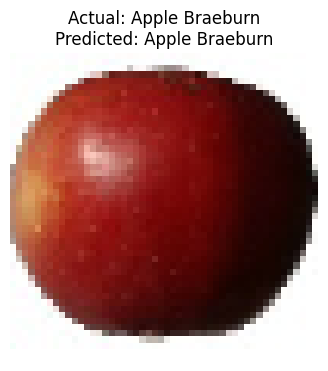

1/1 [==============================] - 0s 17ms/step


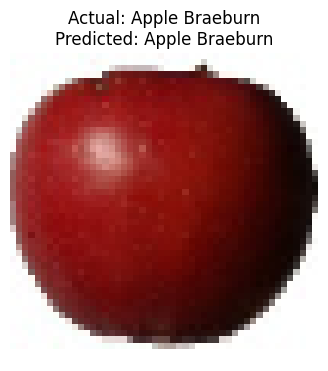

1/1 [==============================] - 0s 18ms/step


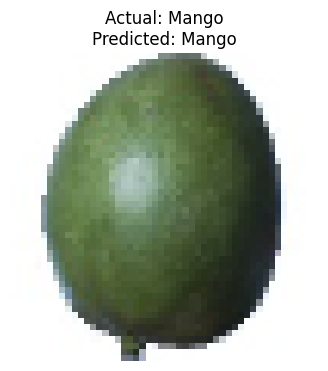

1/1 [==============================] - 0s 19ms/step


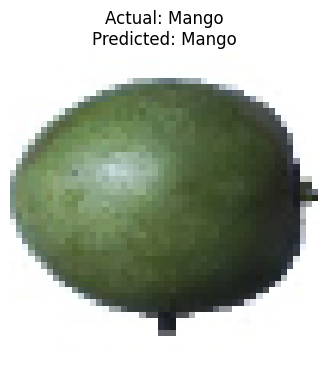

1/1 [==============================] - 0s 19ms/step


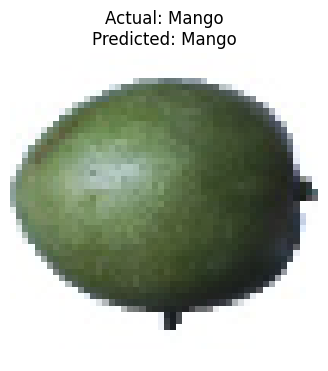

1/1 [==============================] - 0s 20ms/step


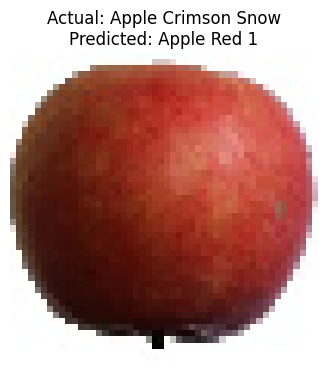

1/1 [==============================] - 0s 20ms/step


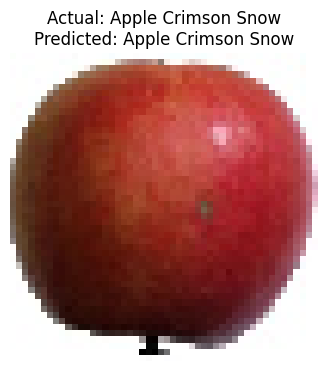

1/1 [==============================] - 0s 16ms/step


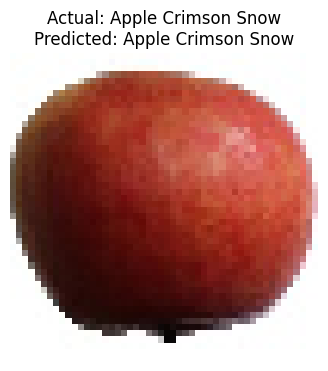

1/1 [==============================] - 0s 16ms/step


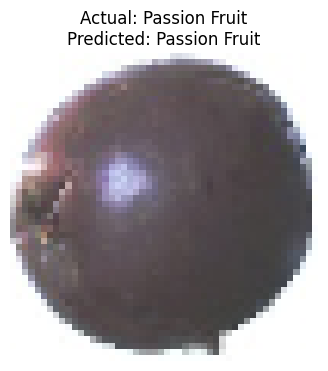

1/1 [==============================] - 0s 17ms/step


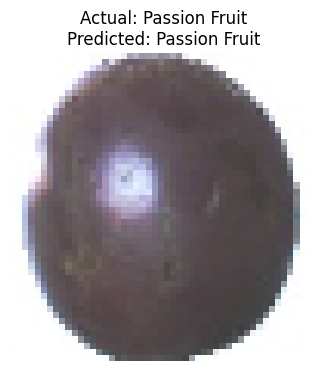

1/1 [==============================] - 0s 18ms/step


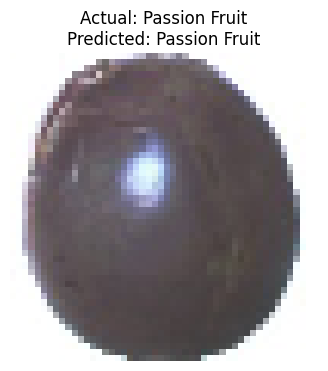

1/1 [==============================] - 0s 19ms/step


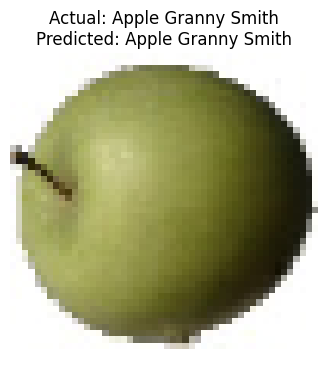

1/1 [==============================] - 0s 18ms/step


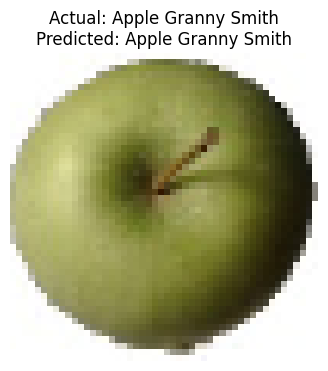

1/1 [==============================] - 0s 19ms/step


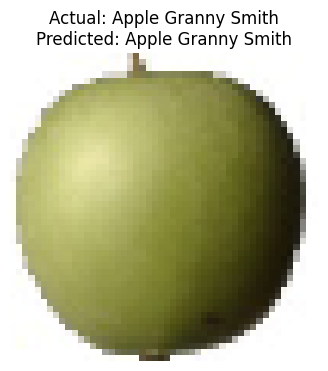

1/1 [==============================] - 0s 19ms/step


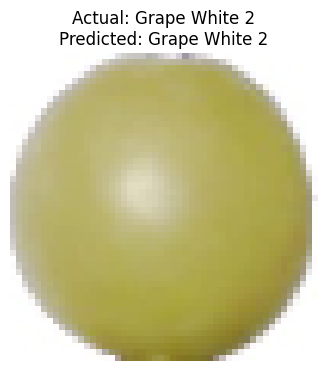

1/1 [==============================] - 0s 18ms/step


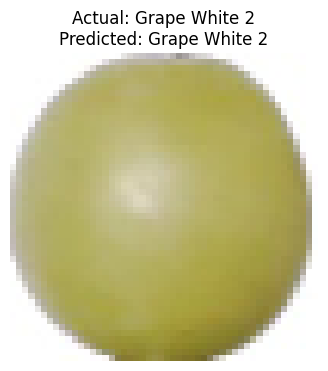

1/1 [==============================] - 0s 17ms/step


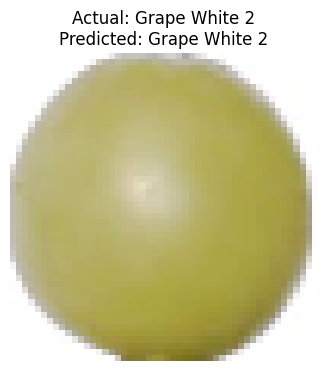

1/1 [==============================] - 0s 17ms/step


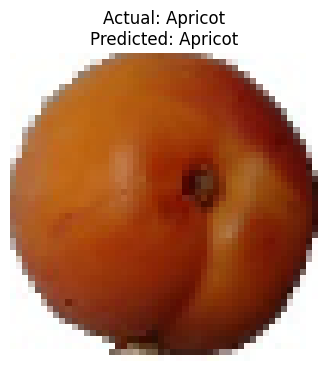

1/1 [==============================] - 0s 19ms/step


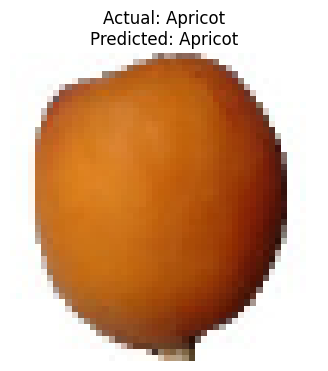

1/1 [==============================] - 0s 19ms/step


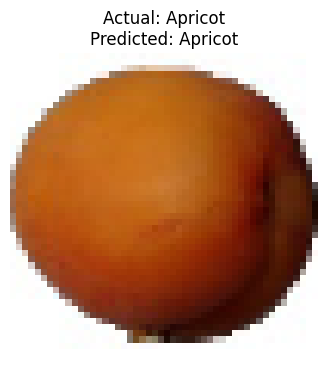

1/1 [==============================] - 0s 18ms/step


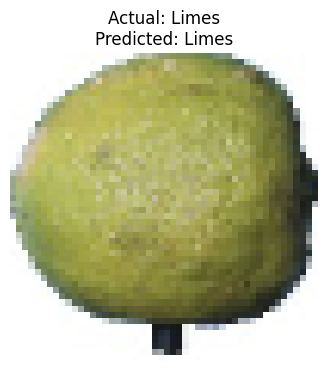

1/1 [==============================] - 0s 17ms/step


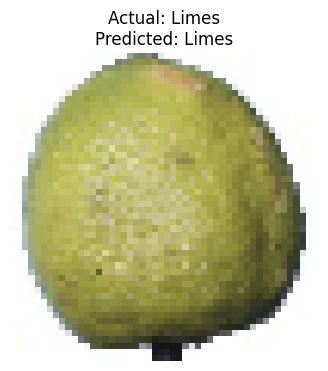

1/1 [==============================] - 0s 16ms/step


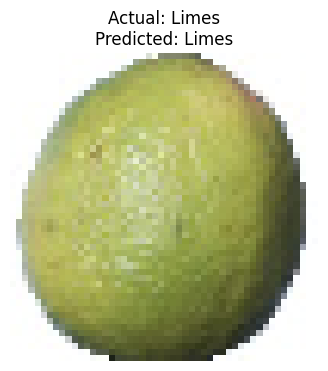

1/1 [==============================] - 0s 17ms/step


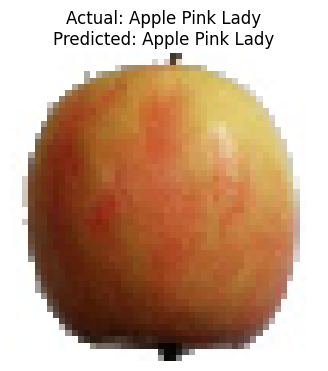

1/1 [==============================] - 0s 16ms/step


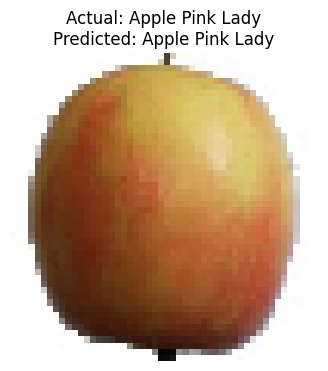

1/1 [==============================] - 0s 17ms/step


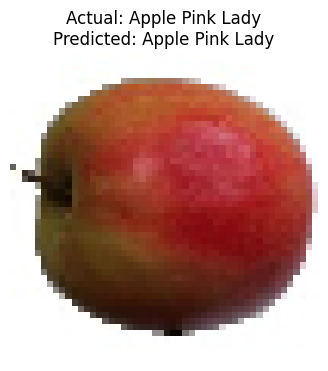

1/1 [==============================] - 0s 16ms/step


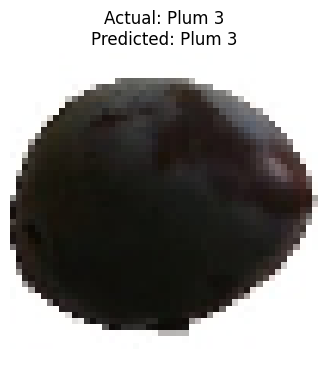

1/1 [==============================] - 0s 17ms/step


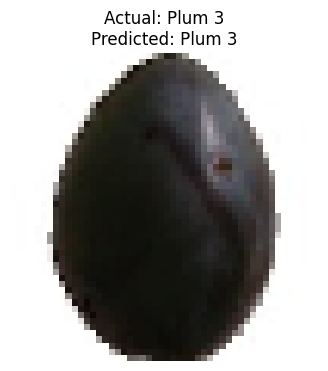

1/1 [==============================] - 0s 17ms/step


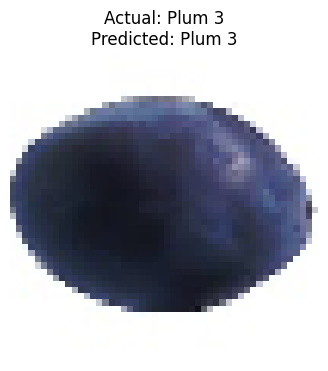

1/1 [==============================] - 0s 18ms/step


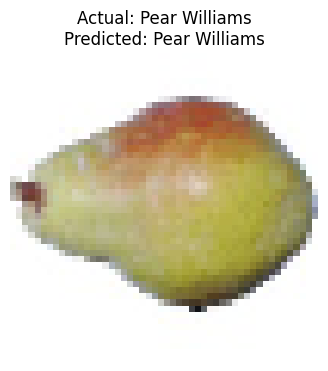

1/1 [==============================] - 0s 18ms/step


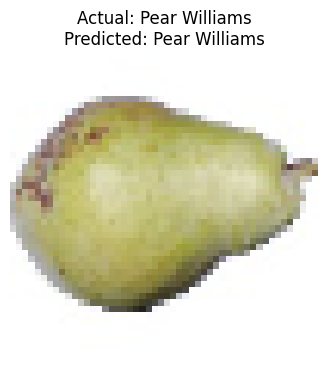

1/1 [==============================] - 0s 21ms/step


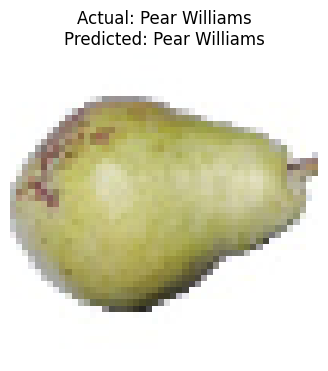

1/1 [==============================] - 0s 19ms/step


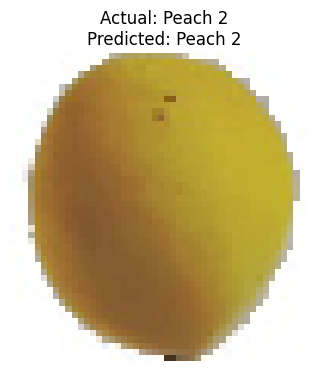

1/1 [==============================] - 0s 20ms/step


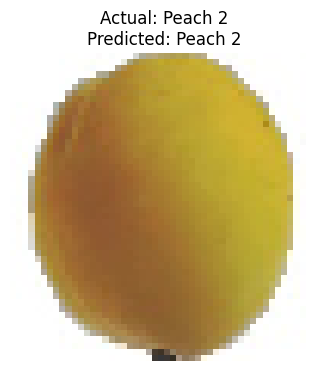

1/1 [==============================] - 0s 17ms/step


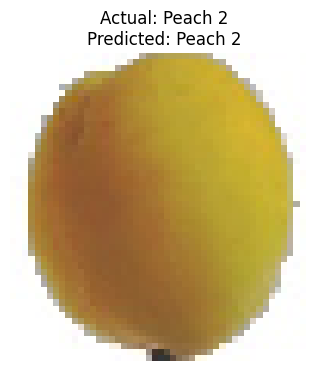

1/1 [==============================] - 0s 16ms/step


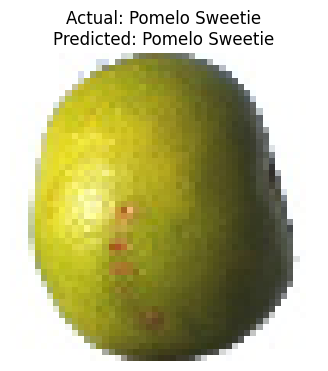

1/1 [==============================] - 0s 18ms/step


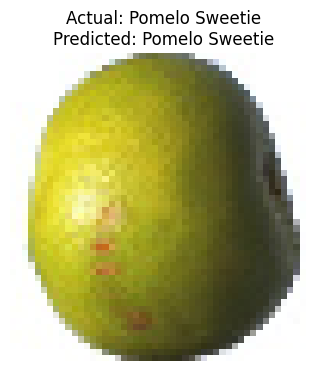

1/1 [==============================] - 0s 18ms/step


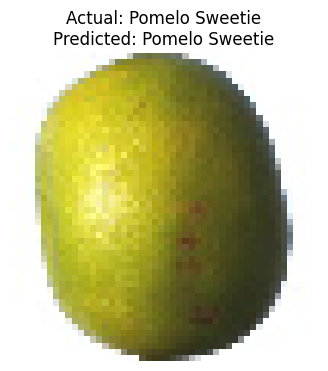

1/1 [==============================] - 0s 20ms/step


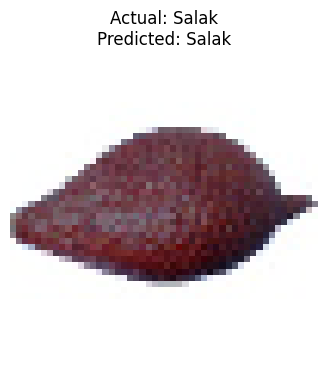

1/1 [==============================] - 0s 19ms/step


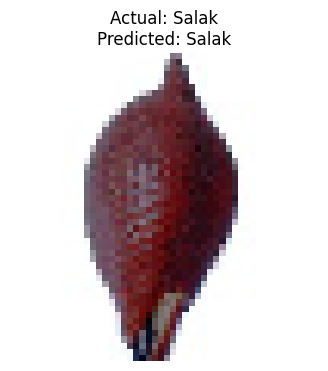

1/1 [==============================] - 0s 19ms/step


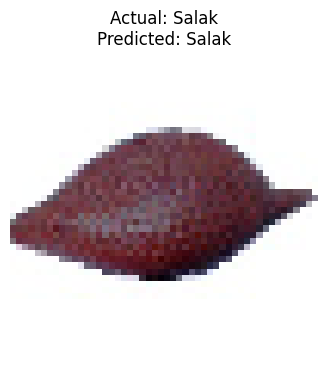

1/1 [==============================] - 0s 18ms/step


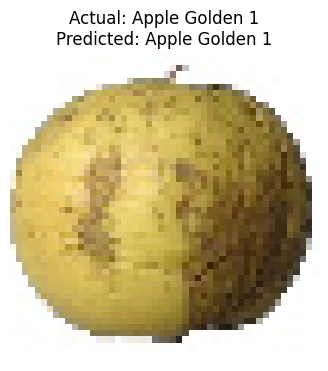

1/1 [==============================] - 0s 18ms/step


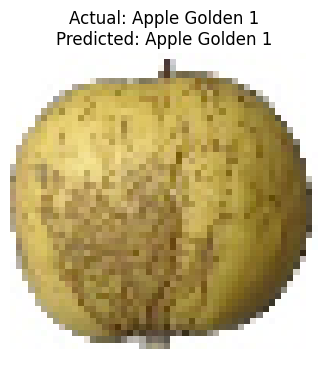

1/1 [==============================] - 0s 19ms/step


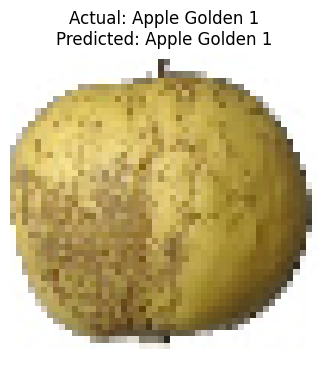

1/1 [==============================] - 0s 18ms/step


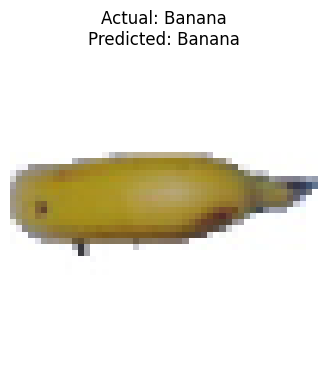

1/1 [==============================] - 0s 20ms/step


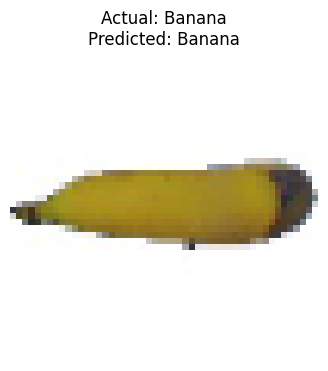

1/1 [==============================] - 0s 18ms/step


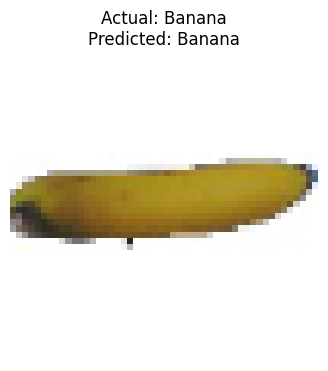

1/1 [==============================] - 0s 17ms/step


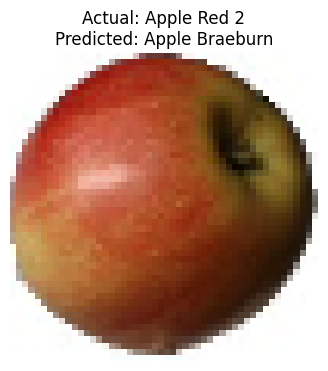

1/1 [==============================] - 0s 20ms/step


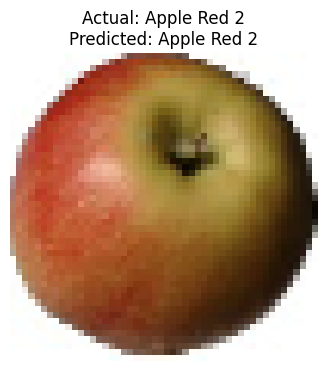

1/1 [==============================] - 0s 18ms/step


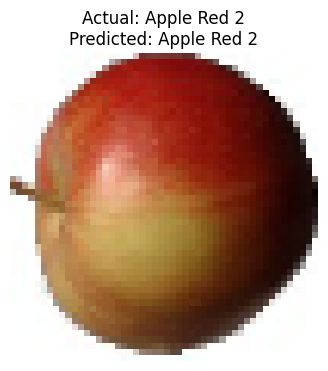

1/1 [==============================] - 0s 18ms/step


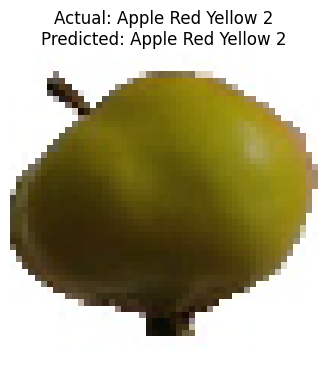

1/1 [==============================] - 0s 17ms/step


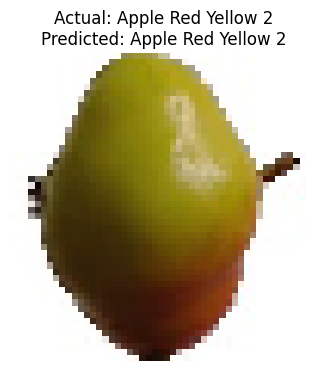

1/1 [==============================] - 0s 18ms/step


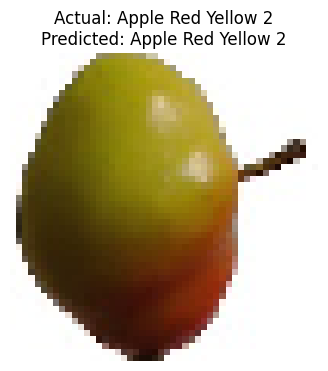

1/1 [==============================] - 0s 18ms/step


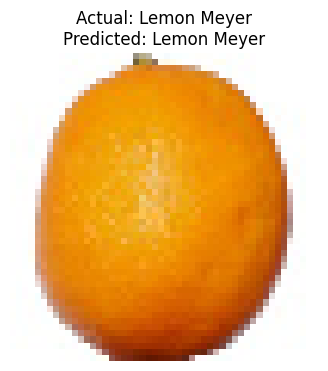

1/1 [==============================] - 0s 17ms/step


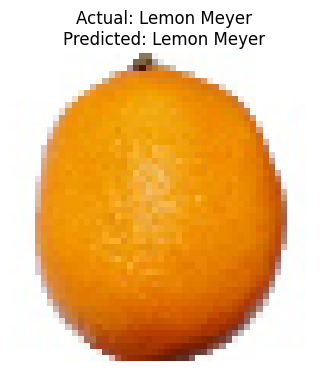

1/1 [==============================] - 0s 18ms/step


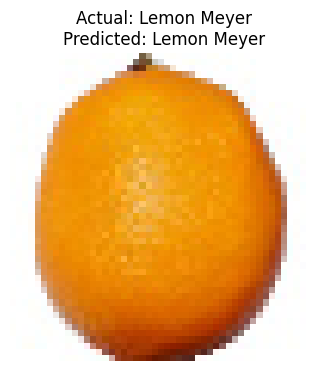

1/1 [==============================] - 0s 19ms/step


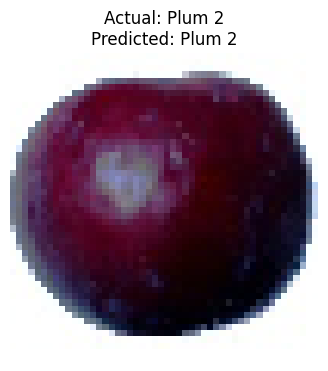

1/1 [==============================] - 0s 19ms/step


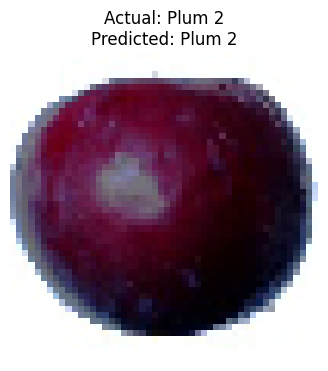

1/1 [==============================] - 0s 19ms/step


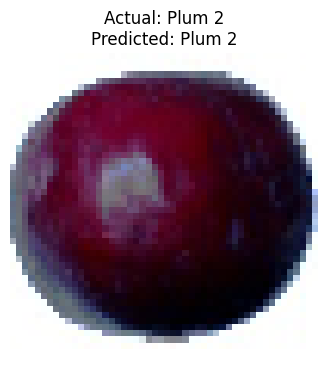

1/1 [==============================] - 0s 18ms/step


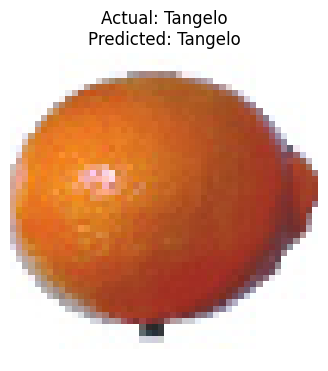

1/1 [==============================] - 0s 19ms/step


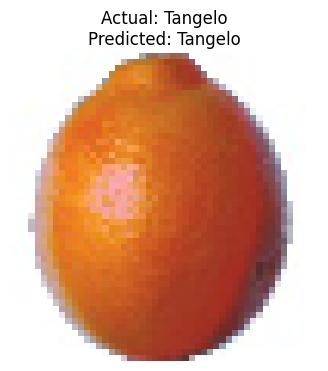

1/1 [==============================] - 0s 17ms/step


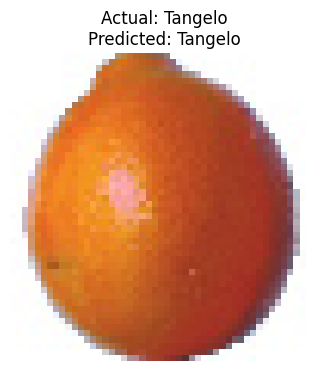

1/1 [==============================] - 0s 18ms/step


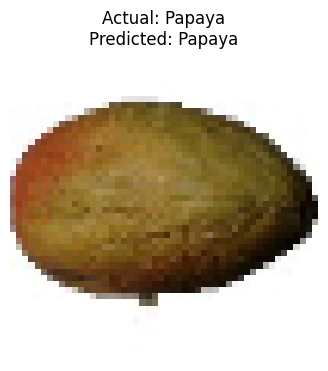

1/1 [==============================] - 0s 17ms/step


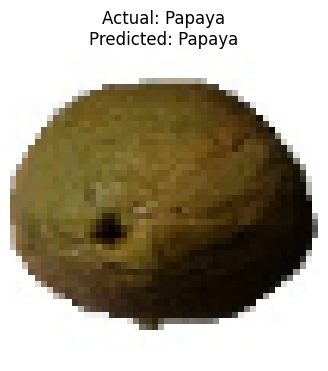

1/1 [==============================] - 0s 19ms/step


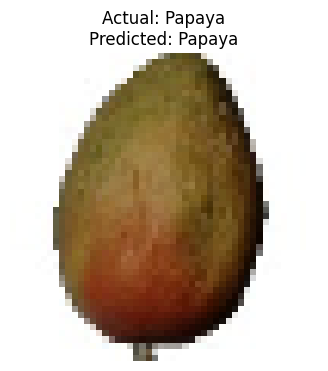

1/1 [==============================] - 0s 19ms/step


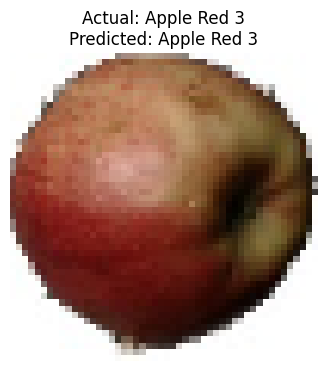

1/1 [==============================] - 0s 19ms/step


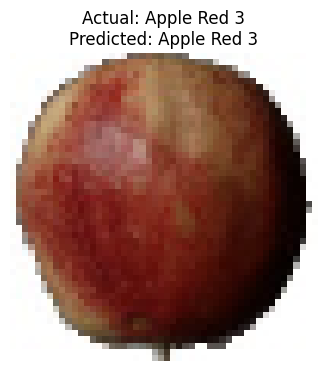

1/1 [==============================] - 0s 18ms/step


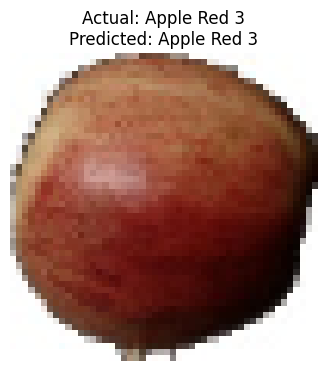

1/1 [==============================] - 0s 18ms/step


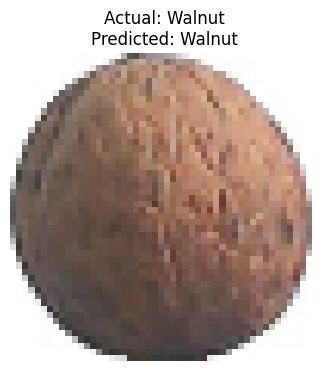

1/1 [==============================] - 0s 18ms/step


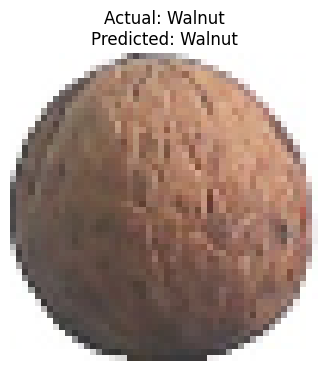

1/1 [==============================] - 0s 17ms/step


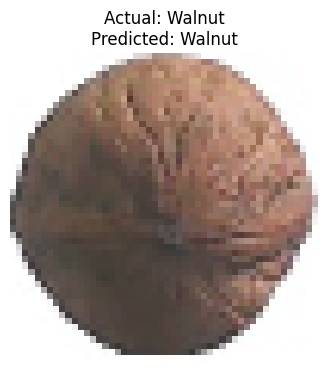

1/1 [==============================] - 0s 18ms/step


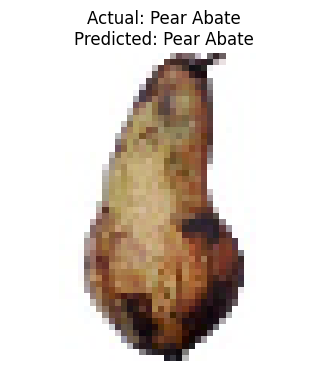

1/1 [==============================] - 0s 18ms/step


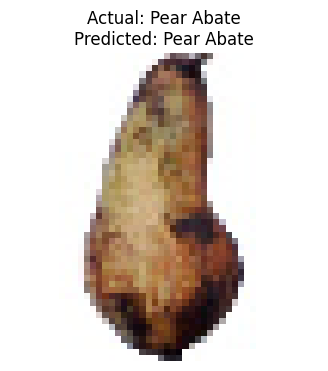

1/1 [==============================] - 0s 19ms/step


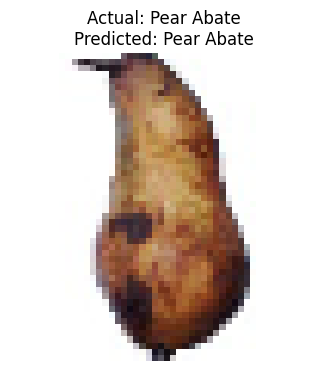

1/1 [==============================] - 0s 18ms/step


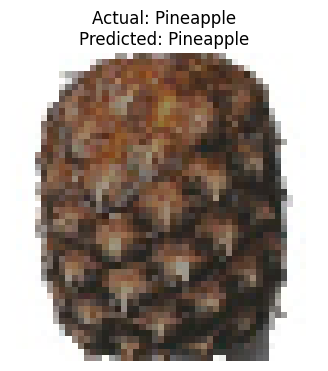

1/1 [==============================] - 0s 18ms/step


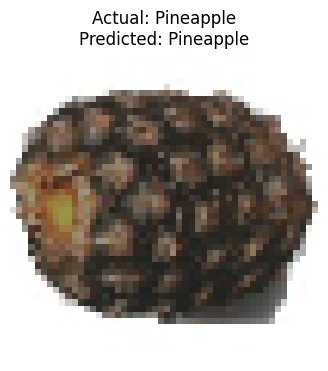

1/1 [==============================] - 0s 19ms/step


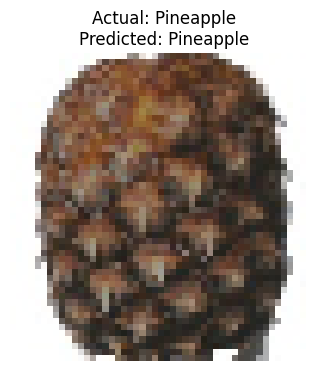

1/1 [==============================] - 0s 19ms/step


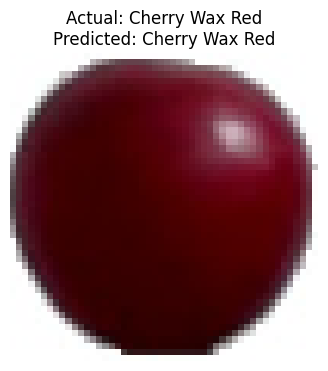

1/1 [==============================] - 0s 19ms/step


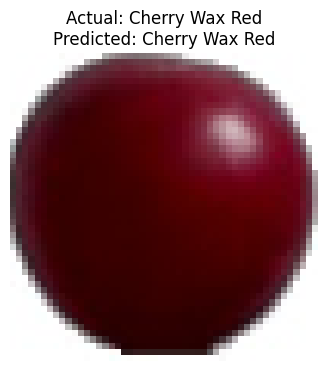

1/1 [==============================] - 0s 21ms/step


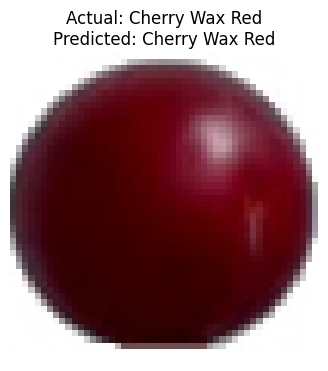

1/1 [==============================] - 0s 22ms/step


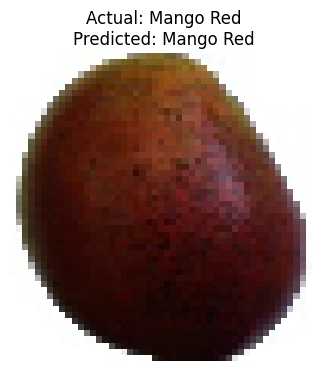

1/1 [==============================] - 0s 18ms/step


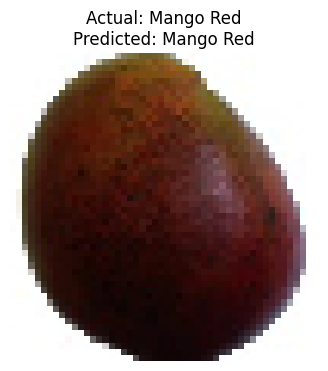

1/1 [==============================] - 0s 18ms/step


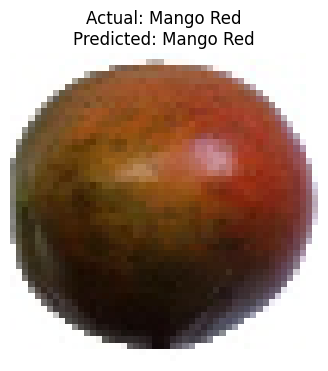

1/1 [==============================] - 0s 18ms/step


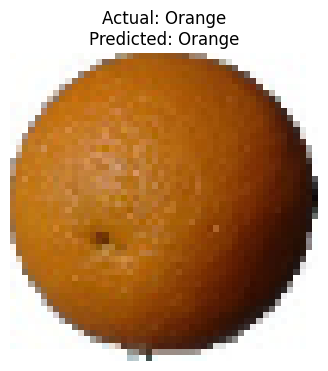

1/1 [==============================] - 0s 19ms/step


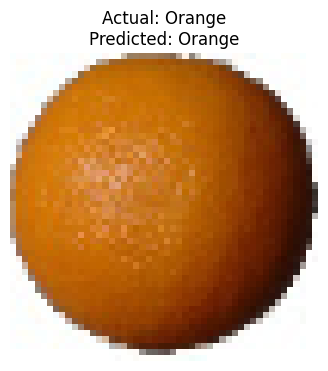

1/1 [==============================] - 0s 19ms/step


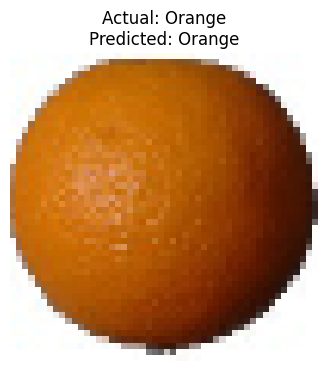

1/1 [==============================] - 0s 19ms/step


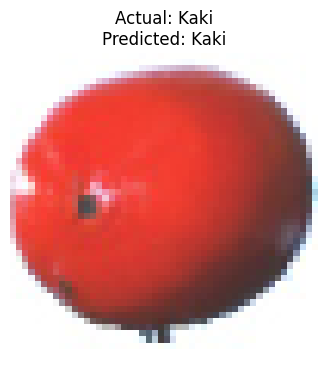

1/1 [==============================] - 0s 19ms/step


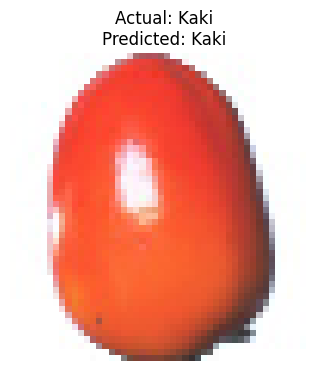

1/1 [==============================] - 0s 20ms/step


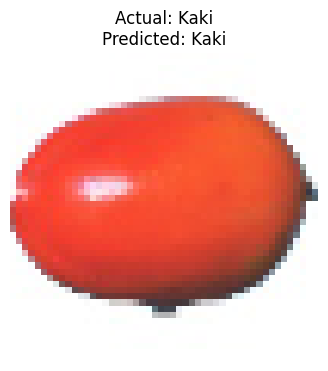

1/1 [==============================] - 0s 17ms/step


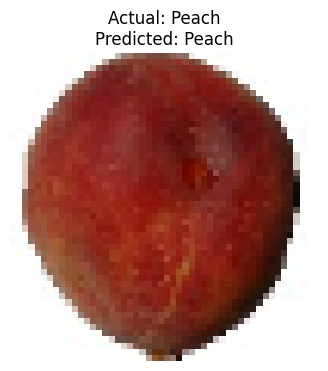

1/1 [==============================] - 0s 18ms/step


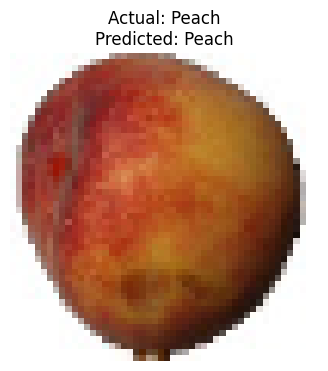

1/1 [==============================] - 0s 19ms/step


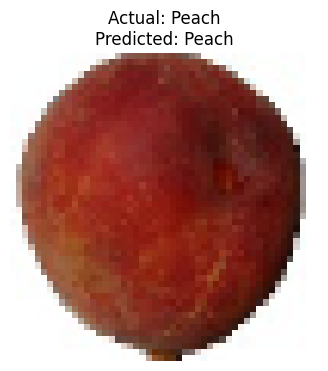

1/1 [==============================] - 0s 19ms/step


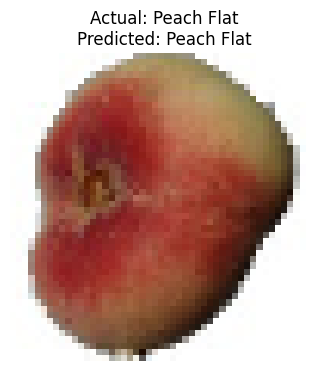

1/1 [==============================] - 0s 19ms/step


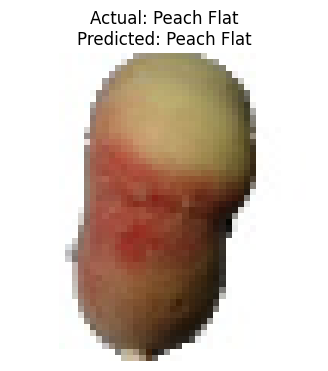

1/1 [==============================] - 0s 20ms/step


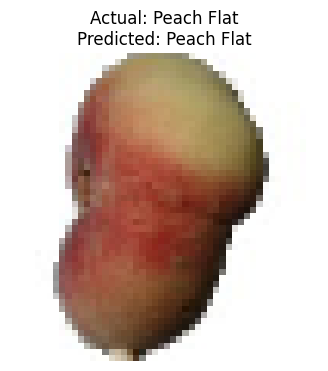

In [23]:
import random

# Directory containing the test images
test_images_path = '/Users/mac/Downloads/fruits-360/Test'

# Get the list of subfolder names in the test folder
subfolders = [subfolder for subfolder in os.listdir(test_images_path) if os.path.isdir(os.path.join(test_images_path, subfolder))]

# Define the number of images to predict and display per folder
images_per_folder = 3

# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(test_images_path, subfolder)
    
    # Check if the subfolder corresponds to a fruit label
    if subfolder in fruit_labels:
        # Get the list of image file names in the subfolder
        test_image_files = os.listdir(subfolder_path)
        
        # Choose random images from the subfolder
        selected_images = random.sample(test_image_files, min(images_per_folder, len(test_image_files)))
        
        # Loop through each selected image file and make predictions
        for image_file in selected_images:
            img_path = os.path.join(subfolder_path, image_file)
            
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=image_size)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.0  # Normalize the pixel values
            
            # Get the actual class (subfolder name)
            actual_class = subfolder
            
            # Get the model's prediction
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction)
            
            # Reverse map the predicted class index to label
            predicted_label = encoder.inverse_transform([predicted_class])[0]
            
            # Display actual and predicted classes along with the image
            plt.figure(figsize=(4, 4))
            plt.imshow(img)
            plt.title(f"Actual: {actual_class}\nPredicted: {predicted_label}")
            plt.axis('off')
            plt.show()


## End. Thanks for attention!